<a href="https://colab.research.google.com/github/LynnSynuo/Health_Insurance_Fraud_Detector/blob/main/Medical_Provider_Fraud_Detector_Snow_2023_12_18_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Setting environment







In [ ]:
# Import drive module from the google.colab library
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Link Colab with data storage

In [ ]:
# Set the working directory to the shared folder
%cd /content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/

# List contents of the current directory
%ls

# Print current working directory
%pwd

/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data
Test-1542969243754.csv                  Train-1542865627584.csv
Test_Beneficiarydata-1542969243754.csv  Train_Beneficiarydata-1542865627584.csv
Test_Inpatientdata-1542969243754.csv    Train_Inpatientdata-1542865627584.csv
Test_Outpatientdata-1542969243754.csv   Train_Outpatientdata-1542865627584.csv


'/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data'

#3.Exploratory data analysis

##3.1 Training data

In [ ]:
import pandas as pd

In [ ]:
# Load dataset

df_train_target = pd.read_csv('./Train-1542865627584.csv')
print(df_train_target.head())
print(df_train_target.info())

unique_providers = df_train_target['Provider'].value_counts()
print(f'unique providers in df_train_target is {len(unique_providers)}')

# 'Provider' is primary key and foreign key

# each Provider is unique
# datatype: object
# no missing data
# 5410 rows x 2 columns
# unique providers in df_train_target is 5410 *

   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
None
unique providers in df_train_target is 5410


In [ ]:
df_train_target[df_train_target['PotentialFraud']=='No']

,Provider,PotentialFraud
0,PRV51001,No
2,PRV51004,No
4,PRV51007,No
5,PRV51008,No
6,PRV51011,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [ ]:
df_train_target['Provider'].value_counts().sort_index()

PRV51001    1
PRV51003    1
PRV51004    1
PRV51005    1
PRV51007    1
           ..
PRV57759    1
PRV57760    1
PRV57761    1
PRV57762    1
PRV57763    1
Name: Provider, Length: 5410, dtype: int64

In [ ]:
# Load dataset

df_train_beneficiary = pd.read_csv('./Train_Beneficiarydata-1542865627584.csv')
print(df_train_beneficiary.head())
print(df_train_beneficiary.info())

unique_BeneID = df_train_beneficiary['BeneID'].value_counts()
print(f'number of unique BeneID is {len(unique_BeneID)}')

# 'BeneID' is the primary key and foreign key
# 138556 rows x 25 columns
# number of unique BeneID is 138556 *

      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2 

In [ ]:
df_train_beneficiary['IPAnnualReimbursementAmt'].value_counts().sort_index()

-8000      1
-1400      1
-1000      1
-640       1
-500       1
          ..
 148580    1
 153580    1
 155270    1
 155600    1
 161470    1
Name: IPAnnualReimbursementAmt, Length: 3004, dtype: int64

In [ ]:
# Calculate missing_percentage for each feature

missing_percentages = df_train_beneficiary.isnull().mean() * 100

# Create a DataFrame to display the missing percentages
missing_data_info = pd.DataFrame({
    'Column': missing_percentages.index,
    'Missing Percentage': missing_percentages.values
})
missing_data_info

# DOD has 99% of missing data
# other than 'DOD', no missing data in other columns

,Column,Missing Percentage
0,BeneID,0.000000
1,DOB,0.000000
2,DOD,98.974422
3,Gender,0.000000
4,Race,0.000000
5,RenalDiseaseIndicator,0.000000
6,State,0.000000
7,County,0.000000
8,NoOfMonths_PartACov,0.000000
9,NoOfMonths_PartBCov,0.000000


In [ ]:
# Load dataset

df_train_inpatient = pd.read_csv('./Train_Inpatientdata-1542865627584.csv')
# print(df_train_inpatientdata.head())
print(df_train_inpatient.info())

unique_BeneID = df_train_inpatient['BeneID'].value_counts()
print(f'unique BeneID in df_train_inpatientdata is {len(unique_BeneID)}')
unique_ClaimID = df_train_inpatient['ClaimID'].value_counts()
print(f'unique ClaimID in df_train_inpatientdata is {len(unique_ClaimID)}')
unique_provider = df_train_inpatient['Provider'].value_counts()
print(f'unique Provider in df_train_inpatientdata is {len(unique_provider)}')

# 'ClaimID' is the primary key
# 'Provider' is the foreign key
# 'BeneID' foreign key??
# 40474 rows x 30 columns
# unique BeneID in df_train_inpatientdata is 31289
# unique ClaimID in df_train_inpatientdata is 40474 *
# unique Provider in df_train_inpatientdata is 2092

In [ ]:
df_train_inpatient['BeneID'].value_counts().sort_index()

In [ ]:
# Calculate missing_percentage of each feature

missing_percentage = df_train_inpatient.isnull().mean() * 100
missing_data_info = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})
missing_data_info

# AttendingPhysician	0.276721
# OperatingPhysician	41.122696
# OtherPhysician	88.412314
# DeductibleAmtPaid	2.221179
#	ClmDiagnosisCode_2	0.558383
#	ClmDiagnosisCode_3	1.670208
#	ClmDiagnosisCode_4	3.790087
#	ClmDiagnosisCode_5	7.150269
#	ClmDiagnosisCode_6	11.953353
#	ClmDiagnosisCode_7	17.932500
#	ClmDiagnosisCode_8	24.563918
#	ClmDiagnosisCode_9	33.347334
#	ClmDiagnosisCode_10	90.297475
#	ClmProcedureCode_1	42.807728
#	ClmProcedureCode_2	86.524683
#	ClmProcedureCode_3	97.615753
#	ClmProcedureCode_4	99.713396
#	ClmProcedureCode_5	99.977764
#	ClmProcedureCode_6	100.000000

In [ ]:
df_train_inpatient['Provider'].value_counts().sort_index()

In [ ]:
# Load dataset

df_train_outpatient = pd.read_csv('./Train_Outpatientdata-1542865627584.csv')
# print(df_train_outpatientdata.head())
print(df_train_outpatient.info())


unique_BeneID = df_train_outpatient['BeneID'].value_counts()
print(f'unique BeneID in df_train_outpatientdata is {len(unique_BeneID)}')

unique_ClaimID = df_train_outpatient['ClaimID'].value_counts()
print(f'unique ClaimID in df_train_outpatientdata is {len(unique_ClaimID)}')

unique_Provider = df_train_outpatient['Provider'].value_counts()
print(f'unique Provider in df_train_outpatientdata is {len(unique_Provider)}')

# 'ClaimID' is primary key and foreign key
# 'Provider' is foreign key
# 'BeneID' is foreign key????
# 517737 rows x 27 columns
# unique BeneID in df_train_outpatientdata is 133980
# unique ClaimID in df_train_outpatientdata is 517737 *
# unique Provider in df_train_outpatientdata is 5012

In [ ]:
# Calculate missing_percentage of each feature

missing_percentage = df_train_outpatient.isnull().mean() * 100
missing_data_info = pd.DataFrame({
    'column':missing_percentage.index,
    'missing percentage': missing_percentage.values
})
missing_data_info

#	AttendingPhysician	0.269635
#	OperatingPhysician	82.497484
#	OtherPhysician	62.327205
#	ClmDiagnosisCode_1	2.018979
#	ClmDiagnosisCode_2	37.737307
#	ClmDiagnosisCode_3	60.741264
#	ClmDiagnosisCode_4	75.741351
#	ClmDiagnosisCode_5	85.640586
#	ClmDiagnosisCode_6	90.582864
#	ClmDiagnosisCode_7	93.633640
#	ClmDiagnosisCode_8	95.574587
#	ClmDiagnosisCode_9	97.134066
#	ClmDiagnosisCode_10	99.790820
#	ClmProcedureCode_1	99.968710
#	ClmProcedureCode_2	99.993047
#	ClmProcedureCode_3	99.999227
#	ClmProcedureCode_4	99.999614
#	ClmProcedureCode_5	100.000000
#	ClmProcedureCode_6	100.000000
#	ClmAdmitDiagnosisCode	79.637345

## 3.2 Training data merge<br>
merge df_train_target & df_train_beneficiary & df_train_inpatient<br>
merge df_train_target & df_train_beneficiary & df_train_outpatient

###3.2.1 Merge with pd.merge
output1: df_train_IP_merge2: 55 columns <br>
output2: df_train_OP_merge2: 52 columns

In [ ]:
# First merge df_train_target and df_train_inpatient on 'provider'
df_train_IP_merge1 = pd.merge(df_train_inpatient, df_train_target, on='Provider', how='left')

print('df_train_IP_merge1 information')
df_train_IP_merge1.info()
print('================')
# df_train_IP_merge1 has 31 columns

# Then merge the result with df_train_beneficiary on 'BeneID'
df_train_IP_merge2 = pd.merge(df_train_IP_merge1, df_train_beneficiary, on='BeneID', how='left')
print('df_train_IP_merge2 information')
df_train_IP_merge2.info()
print('==================')
# df_train_IP_merge2 has 55 columns

In [ ]:
# First merge df_train_target and df_train_outpatient on 'provider'

df_train_OP_merge1 = pd.merge(df_train_outpatient, df_train_target, on='Provider', how='left')
print('df_train_OP_merge1 information')
df_train_OP_merge1.info()
print('================')
# df_train_OP_merge1 has 28 columns


df_train_OP_merge2 = pd.merge(df_train_OP_merge1, df_train_beneficiary, on='BeneID', how='left')
print('df_train_OP_merge2 information')
df_train_OP_merge2.info()
print('================')
# df_train_OP_merge2 has 52 columns

###3.2.2 Merge with SQL
output1: df_train_IP_SQLmerge <br>
output2: df_train_OP_SQLmerge

In [ ]:
from google.colab import auth
auth.authenticate_user()

# Set project_id to your Google Cloud project ID
project_id = "superb-joy-307121"

# Assuming your DataFrames are df_train_target, df_train_beneficiary, df_train_inpatient
# Export DataFrames to Google BigQuery tables
df_train_target.to_gbq(destination_table='your_dataset.df_train_target', project_id=project_id, if_exists='replace')
df_train_beneficiary.to_gbq(destination_table='your_dataset.df_train_beneficiary', project_id=project_id, if_exists='replace')
df_train_inpatient.to_gbq(destination_table='your_dataset.df_train_inpatient', project_id=project_id, if_exists='replace')
df_train_outpatient.to_gbq(destination_table='your_dataset.df_train_outpatient', project_id=project_id, if_exists='replace')


100%|██████████| 1/1 [00:00<00:00, 2006.84it/s]


In [ ]:
%%bigquery df_train_IP_SQLmerge --project superb-joy-307121


SELECT *
FROM your_dataset.df_train_inpatient AS inpatient
LEFT JOIN your_dataset.df_train_target AS target ON inpatient.Provider = target.Provider
LEFT JOIN your_dataset.df_train_beneficiary AS beneficiary ON inpatient.BeneID = beneficiary.BeneID;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery df_train_OP_SQLmerge --project superb-joy-307121

SELECT *
FROM your_dataset.df_train_outpatient AS outpatient
LEFT JOIN your_dataset.df_train_target AS target ON outpatient.Provider = target.Provider
LEFT JOIN your_dataset.df_train_beneficiary AS beneficiary ON outpatient.BeneID = beneficiary.BeneID;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# df_train_IP_SQLmerge.head()
# df_train_IP_SQLmerge.info()
df_train_IP_SQLmerge['Provider_1'].isnull().sum()

0

In [ ]:
df_train_OP_SQLmerge.head()
df_train_OP_SQLmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           517737 non-null  object 
 1   ClaimID                          517737 non-null  object 
 2   ClaimStartDt                     517737 non-null  object 
 3   ClaimEndDt                       517737 non-null  object 
 4   Provider                         517737 non-null  object 
 5   InscClaimAmtReimbursed           517737 non-null  Int64  
 6   AttendingPhysician               516341 non-null  object 
 7   OperatingPhysician               90617 non-null   object 
 8   OtherPhysician                   195046 non-null  object 
 9   ClmDiagnosisCode_1               507284 non-null  object 
 10  ClmDiagnosisCode_2               322357 non-null  object 
 11  ClmDiagnosisCode_3               203257 non-null  object 
 12  Cl

##3.3 Test data

In [ ]:
%ls

Test-1542969243754.csv                  Train-1542865627584.csv
Test_Beneficiarydata-1542969243754.csv  Train_Beneficiarydata-1542865627584.csv
Test_Inpatientdata-1542969243754.csv    Train_Inpatientdata-1542865627584.csv
Test_Outpatientdata-1542969243754.csv   Train_Outpatientdata-1542865627584.csv


In [ ]:
df_test_provider = pd.read_csv('./Test-1542969243754.csv')
print(df_test_provider)
# has 1 column: Provider
# 1353 rows x 1 column

      Provider
0     PRV51002
1     PRV51006
2     PRV51009
3     PRV51010
4     PRV51018
...        ...
1348  PRV57713
1349  PRV57726
1350  PRV57745
1351  PRV57749
1352  PRV57750

[1353 rows x 1 columns]


In [ ]:
df_test_provider['Provider'].value_counts().sort_index()

PRV51002    1
PRV51006    1
PRV51009    1
PRV51010    1
PRV51018    1
           ..
PRV57713    1
PRV57726    1
PRV57745    1
PRV57749    1
PRV57750    1
Name: Provider, Length: 1353, dtype: int64

In [ ]:
df_test_beneficiary = pd.read_csv('./Test_Beneficiarydata-1542969243754.csv')
# df_test_beneficiary.head()
df_test_beneficiary.info()

# 63968 rows x 25 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  object
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [ ]:
df_test_beneficiary['OPAnnualReimbursementAmt'].value_counts().sort_index()

-60          1
-50          1
 0        1039
 10        416
 20        418
          ... 
 81600       1
 85960       1
 86980       1
 94910       1
 97510       1
Name: OPAnnualReimbursementAmt, Length: 1840, dtype: int64

In [ ]:
df_test_inpatient = pd.read_csv('./Test_Inpatientdata-1542969243754.csv')
# df_test_inpatient.head()
df_test_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  9551 non-null   object 
 1   ClaimID                 9551 non-null   object 
 2   ClaimStartDt            9551 non-null   object 
 3   ClaimEndDt              9551 non-null   object 
 4   Provider                9551 non-null   object 
 5   InscClaimAmtReimbursed  9551 non-null   int64  
 6   AttendingPhysician      9520 non-null   object 
 7   OperatingPhysician      5589 non-null   object 
 8   OtherPhysician          1013 non-null   object 
 9   AdmissionDt             9551 non-null   object 
 10  ClmAdmitDiagnosisCode   9551 non-null   object 
 11  DeductibleAmtPaid       9355 non-null   float64
 12  DischargeDt             9551 non-null   object 
 13  DiagnosisGroupCode      9551 non-null   object 
 14  ClmDiagnosisCode_1      9551 non-null   

In [ ]:
df_test_inpatient['DiagnosisGroupCode'].value_counts().sort_index()

000    31
001     6
002     2
003     2
004     4
       ..
988     3
989    10
998     3
999     3
OTH    29
Name: DiagnosisGroupCode, Length: 712, dtype: int64

In [ ]:
df_test_outpatient = pd.read_csv('./Test_Outpatientdata-1542969243754.csv')
# df_test_outpatient.head()
df_test_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125841 entries, 0 to 125840
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  125841 non-null  object 
 1   ClaimID                 125841 non-null  object 
 2   ClaimStartDt            125841 non-null  object 
 3   ClaimEndDt              125841 non-null  object 
 4   Provider                125841 non-null  object 
 5   InscClaimAmtReimbursed  125841 non-null  int64  
 6   AttendingPhysician      125525 non-null  object 
 7   OperatingPhysician      21604 non-null   object 
 8   OtherPhysician          47619 non-null   object 
 9   ClmDiagnosisCode_1      123263 non-null  object 
 10  ClmDiagnosisCode_2      78110 non-null   object 
 11  ClmDiagnosisCode_3      49266 non-null   object 
 12  ClmDiagnosisCode_4      30470 non-null   object 
 13  ClmDiagnosisCode_5      17966 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
df_test_outpatient['ClmAdmitDiagnosisCode'].value_counts().sort_index()

00845     5
00846     2
0088      2
0090      1
0310      1
         ..
V8281    26
V8289     9
V829      5
V854      1
V8801     1
Name: ClmAdmitDiagnosisCode, Length: 2303, dtype: int64

## 3.4 Test data merge<br>
merge df_test_provider & df_test_beneficiary & df_test_inpatient<br>
merge df_test_provider & df_test_beneficiary & df_test_outpatient

###3.4.1 Merge with pd.merge
output1: df_test_IP_merge2<br>
output2: df_test_OP_merge2

In [ ]:
# First merge df_train_target and df_train_inpatient on 'provider'
df_test_IP_merge1 = pd.merge(df_test_inpatient, df_test_provider, on='Provider', how='left')

# Then merge the result with df_train_beneficiary on 'BeneID'
df_test_IP_merge2 = pd.merge(df_test_IP_merge1, df_test_beneficiary, on='BeneID', how='left')

df_test_OP_merge1 = pd.merge(df_test_outpatient, df_test_provider, on='Provider', how='left')
df_test_OP_merge2 = pd.merge(df_test_OP_merge1, df_test_beneficiary, on='BeneID', how='left')

In [ ]:
df_test_IP_merge2.head()
df_test_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           9551 non-null   object 
 1   ClaimID                          9551 non-null   object 
 2   ClaimStartDt                     9551 non-null   object 
 3   ClaimEndDt                       9551 non-null   object 
 4   Provider                         9551 non-null   object 
 5   InscClaimAmtReimbursed           9551 non-null   int64  
 6   AttendingPhysician               9520 non-null   object 
 7   OperatingPhysician               5589 non-null   object 
 8   OtherPhysician                   1013 non-null   object 
 9   AdmissionDt                      9551 non-null   object 
 10  ClmAdmitDiagnosisCode            9551 non-null   object 
 11  DeductibleAmtPaid                9355 non-null   float64
 12  DischargeDt         

In [ ]:
df_test_OP_merge2.head()
df_test_OP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125841 entries, 0 to 125840
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           125841 non-null  object 
 1   ClaimID                          125841 non-null  object 
 2   ClaimStartDt                     125841 non-null  object 
 3   ClaimEndDt                       125841 non-null  object 
 4   Provider                         125841 non-null  object 
 5   InscClaimAmtReimbursed           125841 non-null  int64  
 6   AttendingPhysician               125525 non-null  object 
 7   OperatingPhysician               21604 non-null   object 
 8   OtherPhysician                   47619 non-null   object 
 9   ClmDiagnosisCode_1               123263 non-null  object 
 10  ClmDiagnosisCode_2               78110 non-null   object 
 11  ClmDiagnosisCode_3               49266 non-null   object 
 12  Cl

###3.4.2 Merge with SQL
output1: df_test_IP_SQLmerge<br>
output2: df_test_OP_SQLmerge

In [ ]:
df_test_provider.to_gbq(destination_table='your_dataset.df_test_provider', project_id=project_id, if_exists='replace')
df_test_beneficiary.to_gbq(destination_table='your_dataset.df_test_beneficiary', project_id=project_id, if_exists='replace')
df_test_inpatient.to_gbq(destination_table='your_dataset.df_test_inpatient', project_id=project_id, if_exists='replace')
df_test_outpatient.to_gbq(destination_table='your_dataset.df_test_outpatient', project_id=project_id, if_exists='replace')

In [ ]:
%%bigquery df_test_IP_SQLmerge --project superb-joy-307121

SELECT *
FROM your_dataset.df_test_inpatient AS inpatient
LEFT JOIN your_dataset.df_test_provider AS provider ON inpatient.Provider = provider.Provider
LEFT JOIN your_dataset.df_test_beneficiary AS beneficiary ON inpatient.BeneID = beneficiary.BeneID;

In [ ]:
%%bigquery df_test_OP_SQLmerge --project superb-joy-307121
SELECT *
FROM your_dataset.df_test_outpatient AS outpatient
LEFT JOIN your_dataset.df_test_provider AS provider ON outpatient.Provider = provider.Provider
LEFT JOIN your_dataset.df_test_beneficiary AS beneficiary ON outpatient.BeneID = beneficiary.BeneID;

In [ ]:
df_test_IP_SQLmerge.head()
df_test_IP_SQLmerge.info()

In [ ]:
df_test_OP_SQLmerge.head()
df_test_OP_SQLmerge.info()

##3.5 Check representativeness

In [ ]:
# Check if there is any data leakage

# for Provider in test_providers: It iterates over each element (provider) in the test_providers list.
# Provider in train_providers: For each provider in the test set, it checks if that provider is present in the training set (train_providers).
train_provider = df_train_target['Provider'].unique()
test_provider = df_test_provider['Provider'].unique()

# represent = any(Provider in train_provider for Provider in test_provider)
represent = set(train_provider) & set(test_provider)
# output is False
# Provider in training set and Provider in test set doesn't have any overlap
represent


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-75-44e334aa743a>", line 4, in <cell line: 4>
    test_provider = df_test_provider['Provider'].unique()
NameError: name 'df_test_provider' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/li

In [ ]:
train_IP_provider = df_train_IP_merge2['Provider'].unique()
train_OP_provider = df_train_OP_merge2['Provider'].unique()

# represent2 = any(Provider in train_IP_provider for Provider in train_OP_provider)
represent2 = set(train_IP_provider) & set(train_OP_provider)
type(represent2)
# output is True
# one provider can have IP claim and OP claim
print(len(represent2))

1694


In [ ]:
# Assuming train_IP_provider and train_OP_provider are lists or sets of providers
overlap_providers = set(train_IP_provider) & set(train_OP_provider)
only_in_IP_providers = set(train_IP_provider) - overlap_providers
only_in_OP_providers = set(train_OP_provider) - overlap_providers
IP_OP_providers = set(train_IP_provider) | set(train_OP_provider)

# Count the number of providers in each category
num_overlap_providers = len(overlap_providers)
num_only_in_IP_providers = len(only_in_IP_providers)
num_only_in_OP_providers = len(only_in_OP_providers)
num_IP_OP_providers =len(IP_OP_providers)


print(num_overlap_providers) # output is 1694
print(num_only_in_IP_providers) # output is 398
print(num_only_in_OP_providers) # output is 3318
print(num_IP_OP_providers) # output is 5410

1694
398
3318
5410


In [ ]:
print(len(df_train_IP_merge2['Provider'].unique())) # output 2092
print(len(df_train_OP_merge2['Provider'].unique())) # output 5012

2092
5012


In [ ]:
fraud_count_overlap = df_train_target[df_train_target['Provider'].isin(overlap_providers)]['PotentialFraud'].value_counts()
fraud_count_only_in_IP = df_train_target[df_train_target['Provider'].isin(only_in_IP_providers)]['PotentialFraud'].value_counts()
fraud_count_only_in_OP = df_train_target[df_train_target['Provider'].isin(only_in_OP_providers)]['PotentialFraud'].value_counts()

print(fraud_count_overlap)
print('===========')
print(fraud_count_only_in_IP)
print('============')
print(fraud_count_only_in_OP)
print('==============')

No     1298
Yes     396
Name: PotentialFraud, dtype: int64
No     354
Yes     44
Name: PotentialFraud, dtype: int64
No     3252
Yes      66
Name: PotentialFraud, dtype: int64


In [ ]:
test_IP_provider = df_test_IP_merge2['Provider'].unique()
test_OP_provider = df_test_OP_merge2['Provider'].unique()

# represent4 = any(Provider in test_IP_provider for Provider in test_OP_provider)
represent4 = set(test_IP_provider) & set(test_OP_provider)
represent4
# output is True
# one provider can have IP claim and OP claim
print(len(represent4))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-79-0fcfd65551f3>", line 1, in <cell line: 1>
    test_IP_provider = df_test_IP_merge2['Provider'].unique()
NameError: name 'df_test_IP_merge2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/loc

In [ ]:
overlap_providers_test = set(test_IP_provider) & set(test_OP_provider)
only_in_IP_providers_test = set(test_IP_provider) - overlap_providers_test
only_in_OP_providers_test = set(test_OP_provider) - overlap_providers_test
IP_OP_providers_test = set(test_IP_provider) | set(test_OP_provider)

print(len(overlap_providers_test)) #output 426
print(len(only_in_IP_providers_test)) # output 94
print(len(only_in_OP_providers_test)) # 833
print(len(IP_OP_providers_test)) # 1353

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-79-82674501dd88>", line 1, in <cell line: 1>
    overlap_providers_test = set(test_IP_provider) & set(test_OP_provider)
NameError: name 'test_IP_provider' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  Fi

In [ ]:
train_IP_claimid = df_train_IP_merge2['ClaimID'].unique()
train_OP_claimid = df_train_OP_merge2['ClaimID'].unique()

# represent3 = any(ClaimID in train_OP_claimid for ClaimID in train_IP_claimid)
represent3 = set(train_IP_claimid) & set(train_OP_claimid)
represent3
# takes long time to run
# output is False
# ClaimID of IP and ClaimID of OP doesn't overlap

## 3.6 Visualization

###3.6.1 Non-fraud vs. Fraud

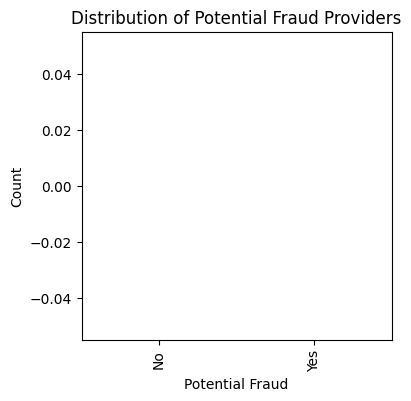

In [ ]:
import matplotlib.pyplot as plt

fraud_counts = df_train_target['PotentialFraud'].value_counts()
plt.figure(figsize =(4,4))
fraud_counts = fraud_counts.reindex(['No','Yes'])
fraud_counts.plot(kind = 'bar',color = ['darkblue','darkorange'])

plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.title('Distribution of Potential Fraud Providers')

for i, count in enumerate(fraud_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', color='black',fontsize = 10)

plt.show()

In [ ]:
df_train_target['PotentialFraud'].value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

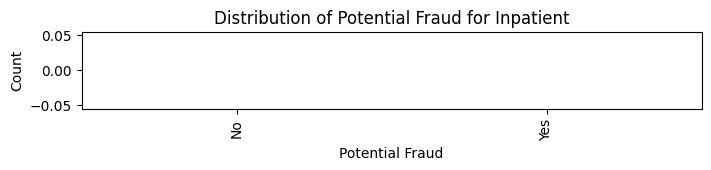

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the values in the 'PotentialFraud' column
fraud_counts_IP = df_train_IP_merge2['PotentialFraud'].value_counts()

plt.figure(figsize=(8, 1))
fraud_counts_IP = fraud_counts_IP.reindex(['No', 'Yes'])
#fraud_counts_IP = fraud_counts_IP.sort_index()
# Plot a bar chart
fraud_counts_IP.plot(kind='bar', color=['darkblue','darkorange'])


# Add labels and title
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.title('Distribution of Potential Fraud for Inpatient')

# for i, count in enumerate(fraud_counts_IP):
#     plt.text(i, count + 0.1, str(count), ha='center', va='bottom', color='black',fontsize = 7)

# Show the plot
plt.show()

In [ ]:
df_train_IP_merge2['PotentialFraud'].value_counts()

1    23402
0    17072
Name: PotentialFraud, dtype: int64

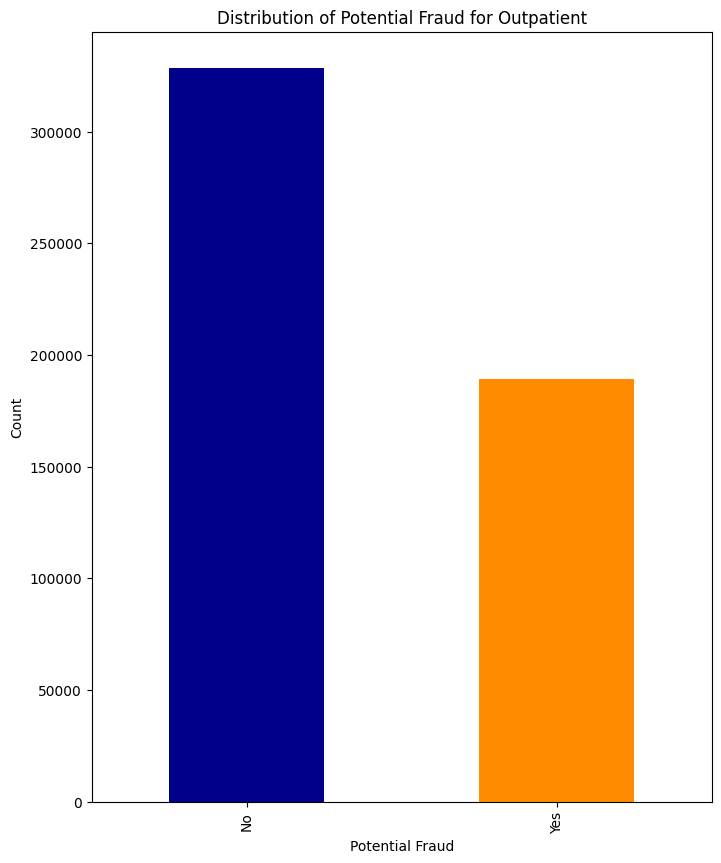

In [ ]:
fraud_counts_OP = df_train_OP_merge2['PotentialFraud'].value_counts()

plt.figure(figsize=(8, 10))
fraud_counts_OP = fraud_counts_OP.reindex(['No','Yes'])
fraud_counts_OP.plot(kind='bar', color=['darkblue', 'darkorange'])

# Add labels and title
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.title('Distribution of Potential Fraud for Outpatient')


# for i, count in enumerate(fraud_counts_OP):
#     plt.text(i, count + 0.1, str(count), ha='center', va='bottom', color='black',fontsize = 7)
# Show the plot
plt.show()


In [ ]:
df_train_OP_merge2['PotentialFraud'].value_counts()

No     328343
Yes    189394
Name: PotentialFraud, dtype: int64

### 3.6.2 Provider IP OP service

In [ ]:
# fraud_count_overlap = df_train_target[df_train_target['Provider'].isin(overlap_providers)]['PotentialFraud'].value_counts()
# fraud_count_only_in_IP = df_train_target[df_train_target['Provider'].isin(only_in_IP_providers)]['PotentialFraud'].value_counts()
# fraud_count_only_in_OP = df_train_target[df_train_target['Provider'].isin(only_in_OP_providers)]['PotentialFraud'].value_counts()


import matplotlib.pyplot as plt


fraud_count_overlap.plot(kind = 'pie',colors = ['darkblue','darkorange'])
# plt.figure(figsize = (2,2))
# plt.axis('equal')
# plt.gca().set_facecolor('none')
plt.title('Overlap')
plt.show()

NameError: name 'fraud_count_overlap' is not defined

In [ ]:
fraud_count_only_in_IP.plot(kind = 'pie',colors = ['darkblue','darkorange'])
plt.title('Train_IP')
plt.show()

In [ ]:
fraud_count_only_in_OP.plot(kind='pie', colors = ['darkblue','darkorange'])
plt.title('Train_OP')
plt.show()

### 3.6.3 Num_Claims vs. Provider

In [ ]:
# Count how many claims each provider transfer
ip_claim_counts_EachProvider = df_train_IP_merge2.groupby('Provider')['PotentialFraud'].value_counts().sort_values(ascending = False).head(10)
ip_claim_counts_EachProvider

In [ ]:
# Convert the series to a DataFrame
ip_claim_counts_df = ip_claim_counts_EachProvider.unstack().fillna(0)

# Plot the histogram
ax = ip_claim_counts_df.plot(kind='bar', stacked=True, color={'No': 'darkblue', 'Yes': 'darkorange'}, figsize=(10, 6))

# Set plot labels and title
ax.set_xlabel('Provider ID')
ax.set_ylabel('Number of Claims')
ax.set_title('Top 10 Providers Based on Number of Claims_IP')

# Display the legend
ax.legend(title='Potential Fraud', labels=['Fraudulent'])
# 'Not Fraudulent',
# ax.tick_params(axis='x', labelsize=1)
# no xticks
ax.set_xticks([])
# Show the plot
plt.show()

In [ ]:
# Count how many claims each provider transfer
op_claim_counts_EachProvider = df_train_OP_merge2.groupby('Provider')['PotentialFraud'].value_counts().sort_values(ascending = False).head(1000)
# op_claim_counts_EachProvider

In [ ]:
# Convert the series to a DataFrame
op_claim_counts_df = op_claim_counts_EachProvider.unstack().fillna(0)

# Plot the histogram
ax = op_claim_counts_df.plot(kind='bar', stacked=True, color={'No': 'darkblue', 'Yes': 'darkorange'}, figsize=(10, 6))

# Set plot labels and title
ax.set_xlabel('Provider')
ax.set_ylabel('Number of Claims')
ax.set_title('Top 1000 Providers Based on Number of Claims_OP')

# Display the legend
ax.legend(title='Potential Fraud', labels=['Not Fraudulent','Fraudulent'])
# 'Not Fraudulent',
# ax.tick_params(axis='x', labelsize=1)
# no xticks
ax.set_xticks([])
# Show the plot
plt.show()

In [ ]:
ip_claim_counts_df

###3.6.4 InscClaimAmtReimbursed unfraud vs. fraud, inpatient outpatient

In [ ]:
IP_InscClaimAmtReimbursed_unfraud_vs_fraud = df_train_IP_merge2.groupby('PotentialFraud')['InscClaimAmtReimbursed'].sum()
print(IP_InscClaimAmtReimbursed_unfraud_vs_fraud)

plt.figure(figsize = (8,10))
IP_InscClaimAmtReimbursed_unfraud_vs_fraud.plot(kind= 'bar', color =['darkblue','darkorange'])

plt.title('Insurance Claim Amount Reimbursed to Un-fraudulent vs. Fraudulent Claims_IP')
plt.xlabel('Potential Fraud')
plt.ylabel('Sum of claim amount reimbursed')
plt.show()

In [ ]:
OP_InscClaimAmtReimbursed_unfraud_vs_fraud = df_train_OP_merge2.groupby('PotentialFraud')['InscClaimAmtReimbursed'].sum()
print(OP_InscClaimAmtReimbursed_unfraud_vs_fraud)

plt.figure(figsize = (8,2))
OP_InscClaimAmtReimbursed_unfraud_vs_fraud.plot(kind= 'bar', color =['darkblue','darkorange'])
plt.title('Insurance Claim Amount Reimbursed to Un-fraudulent vs. Fraudulent Claims_OP')
plt.xlabel('Potential Fraud')
plt.ylabel('Sum of claim amount reimbursed')

plt.show()

### 3.6.4 Num_Claims vs. State

In [ ]:
# Count the occurrences of Potential Fraud by State
ip_state_fraud_counts = df_train_IP_merge2.groupby('State')['PotentialFraud'].value_counts(normalize = True).unstack().fillna(0)
ip_state_fraud_counts = ip_state_fraud_counts.sort_values(by = [1,0], ascending = False)


In [ ]:
import matplotlib.pyplot as plt
# Define colors for each category (acknowledge: YanYan)
# colors = ['viridis' if index == 'Yes' else 'lightblue' for index in in_state_fraud_counts.columns]

# Plotting


ip_state_fraud_counts.plot(kind='bar', stacked=True, color = ['darkblue','darkorange'])

# Adding titles and labels

plt.title('Potential Fraud Distribution by State (Inpatient)')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90, fontsize=8)

plt.figure(figsize=(6,1))
plt.show()

In [ ]:
# Calculate percentage of each category
ip_state_fraud_percentage = df_train_IP_merge2.groupby('State')['PotentialFraud'].value_counts(normalize=True).unstack().fillna(0) * 100
ip_state_fraud_percentage.plot(kind='bar', stacked=True, color = ['darkblue','darkorange'])

# Adding titles and labels

plt.title('Potential Fraud Distribution by State (Inpatient)')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90, fontsize=8)

plt.figure(figsize=(6,1))
plt.show()

In [ ]:
# Count the occurrences of Potential Fraud by State
op_state_fraud_counts = df_train_OP_merge2.groupby('State')['PotentialFraud'].value_counts().unstack().fillna(0)
op_state_fraud_counts = op_state_fraud_counts.sort_values(by=['Yes','No'],ascending=False )

In [ ]:
# Plotting

op_state_fraud_counts.plot(kind='bar', stacked=True, color = ['darkblue','darkorange'])

# Adding titles and labels

plt.title('Potential Fraud Distribution by State (Outpatient)')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90, fontsize=8)

plt.figure(figsize=(6,10))
plt.show()

In [ ]:
# Calculate percentage of each category
op_state_fraud_percentage = df_train_OP_merge2.groupby('State')['PotentialFraud'].value_counts(normalize=True).unstack().fillna(0) * 100
op_state_fraud_percentage = op_state_fraud_percentage.sort_values(by =['Yes','No'], ascending =False )
op_state_fraud_percentage.plot(kind='bar', stacked=True, color = ['darkblue','darkorange'])

# Adding titles and labels

plt.title('Potential Fraud Distribution by State (Outpatient)')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90, fontsize=8)

plt.figure(figsize=(6,1))
plt.show()

###3.6.5 Num_BeneID vs. Fraud

In [ ]:
IP_num_BeneID_count = df_train_IP_merge2.groupby(['num_BeneID'])['PotentialFraud'].value_counts().unstack()
IP_num_BeneID_count
# num_BeneID represent how many doctor visits in 2009

IP_num_BeneID_count.plot(kind = 'bar', stacked = True, color = {'No': 'darkblue', 'Yes': 'darkorange'})
plt.title('Number of Doctor Visits Distribution_IP')
plt.xlabel('Number of doctor visit')
plt.ylabel('Count')
# plt.xticks(range(1,9))
plt.show()

In [ ]:
IP_num_BeneID_percentage = df_train_IP_merge2.groupby(['num_BeneID'])['PotentialFraud'].value_counts(normalize = True).unstack()*100
IP_num_BeneID_percentage
# num_BeneID represent how many doctor visits in 2009

IP_num_BeneID_percentage.plot(kind = 'bar', stacked = True, color = {'No': 'darkblue', 'Yes': 'darkorange'})
plt.title('Percentage of Doctor Visits Distribution_IP')
plt.xlabel('Number of doctor visit')
plt.ylabel('Percentage')
# plt.xticks(range(1,9))
plt.show()

###3.6.6 BeneID_provider vs. Fraud

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

IP_BeneID_provider_vs_fraud = df_train_IP_merge2.groupby('Provider').agg({'BeneID_provider': 'first','PotentialFraud':'first'})
IP_BeneID_provider_vs_fraud = IP_BeneID_provider_vs_fraud.sort_values(by='BeneID_provider', ascending = False).head(400)

sns.barplot(x=IP_BeneID_provider_vs_fraud.index, y='BeneID_provider', data = IP_BeneID_provider_vs_fraud, hue = 'PotentialFraud', palette={0:'darkblue',1:'darkorange'})
plt.xticks([])
plt.title('Number of Beneficiaries for Specific Provider_IP')
plt.xlabel('Provider ID')
plt.ylabel('Number of Beneficiaries for specific provider')
plt.show()

###3.6.6 ClaimDuration vs. Fraud

In [ ]:
IP_ClaimDuration_count = df_train_IP_merge2.groupby(['ClaimDuration'])['PotentialFraud'].value_counts().unstack()

IP_ClaimDuration_count
# IP_ClaimDuration is in range 0 to 36 days, inclusive

IP_ClaimDuration_count.plot(kind='bar', stacked=True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('ClaimDuration Distribution_IP')
plt.xlabel('Claim duration in days')
plt.ylabel('Count')
plt.xticks(range(37),range(37))
plt.show()

In [ ]:
IP_ClaimDuration_percentage = df_train_IP_merge2.groupby(['ClaimDuration'])['PotentialFraud'].value_counts(normalize = True).unstack()*100

IP_ClaimDuration_percentage
# IP_ClaimDuration is in range 0 to 36 days, inclusive

IP_ClaimDuration_percentage.plot(kind='bar', stacked=True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('ClaimDuration Distribution_IP')
plt.xlabel('Claim duration in days')
plt.ylabel('Percentage')
plt.xticks(range(37),range(37))
plt.show()

###3.6.7 ClaimStartDt_week vs. Fraud

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-fabc82a82732>", line 4, in <cell line: 4>
    IP_ClaimStartDt_week_vs_fraud.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_core.py", line 1000, in __call__
    return plot_backend.plot(data, kind=kind, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/__init__.py", line 71, in plot
    plot_obj.generate()
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py", line 452, in generate
    self._make_plot()
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py", line 1672, in _make_plot
    kwds["color"] = colors[label]
KeyError: 0

During handling of the above exception, another exceptio

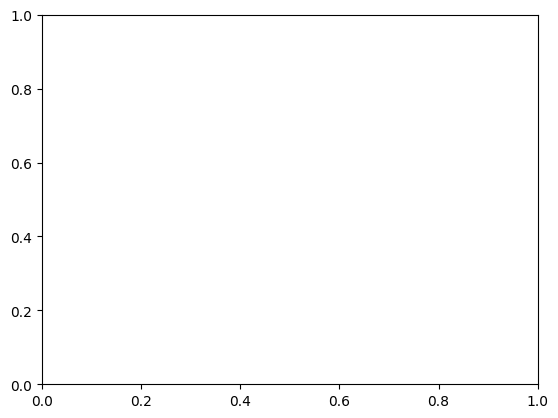

In [ ]:
IP_ClaimStartDt_week_vs_fraud = df_train_IP_merge2.groupby('ClaimStartDt_week')['PotentialFraud'].value_counts().unstack()
IP_ClaimStartDt_week_vs_fraud

IP_ClaimStartDt_week_vs_fraud.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('ClaimStartDt_week vs. Fraud')
plt.xlabel('ClaimStartDt_week')
plt.ylabel('Number of claims')
plt.xticks(fontsize=6)
plt.show()

In [ ]:
df_train_IP_merge2.groupby('ClaimStartDt_week').agg({'ClaimID':'count'}).mean()
# 763.660377 claims are started each week

###3.6.8 ClaimEndDt_week vs. Fraud

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-9c6fc5d73dd1>", line 4, in <cell line: 4>
    IP_ClaimEndDt_week_vs_fraud.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_core.py", line 1000, in __call__
    return plot_backend.plot(data, kind=kind, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/__init__.py", line 71, in plot
    plot_obj.generate()
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py", line 452, in generate
    self._make_plot()
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py", line 1672, in _make_plot
    kwds["color"] = colors[label]
KeyError: 0

During handling of the above exception, another exception 

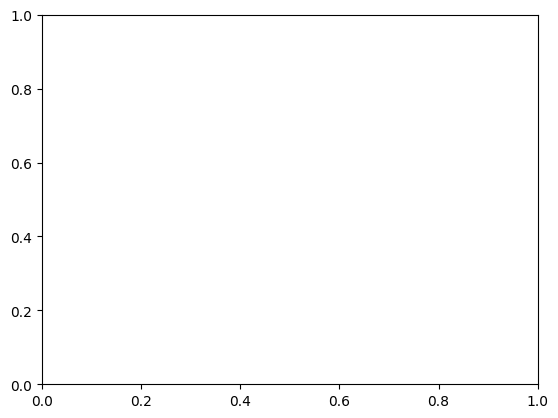

In [ ]:
IP_ClaimEndDt_week_vs_fraud = df_train_IP_merge2.groupby('ClaimEndDt_week')['PotentialFraud'].value_counts().unstack()
IP_ClaimEndDt_week_vs_fraud

IP_ClaimEndDt_week_vs_fraud.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('ClaimEndDt_week vs. Fraud')
plt.xlabel('ClaimEndDt_week')
plt.ylabel('Number of claims')
plt.xticks(fontsize=6)
plt.show()

In [ ]:
df_train_IP_merge2.groupby('ClaimEndDt_week').agg({'ClaimID':'count'}).mean()
# 763.660377 claims are ended each week

###3.6.7 Num_Provider vs. Fraud

In [ ]:
IP_num_Provider_count = df_train_IP_merge2.groupby(['num_Provider'])['PotentialFraud'].value_counts().unstack()
IP_num_Provider_count
# in range from 1 to 516

IP_num_Provider_count.plot(kind='bar', stacked = True, color ={'No': 'darkblue','Yes':'darkorange'})
plt.title('Number of Claims Transferred by Specific Provider_IP')
plt.xlabel('Number of claims transferred by specific provider')
plt.ylabel('Count')
plt.xticks([])
plt.show()

In [ ]:
IP_num_Provider_count

In [ ]:
IP_num_Provider_percentage = df_train_IP_merge2.groupby(['num_Provider'])['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_num_Provider_percentage
# in range from 1 to 516

IP_num_Provider_percentage.plot(kind='bar', stacked = True, color ={'No': 'darkblue','Yes':'darkorange'})
plt.title('Percentage of Claims Transferred by Specific Provider_IP')
plt.xlabel('Number of claims transferred by specific provider')
plt.ylabel('Percentage')
plt.xticks([])
plt.show()

###3.6.8 ProviderSerice vs. Fraud

In [ ]:
IP_ProviderSercie_count = df_train_IP_merge2.groupby('ProviderService')['PotentialFraud'].value_counts().unstack()
IP_ProviderSercie_count

IP_ProviderSercie_count.plot(kind= 'bar', stacked=True, color ={'No': 'darkblue', 'Yes':'darkorange'})
plt.title('Provider Provide IP, OP or Both Services vs. Fraud')
plt.xlabel('IP service only (1), both IP and OP services (2)')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_ProviderSercie_percentage = df_train_IP_merge2.groupby('ProviderService')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_ProviderSercie_percentage

IP_ProviderSercie_percentage.plot(kind= 'bar', stacked=True, color ={'No': 'darkblue', 'Yes':'darkorange'})
plt.title('Provider Provide IP, OP or Both Services vs. Fraud')
plt.xlabel('IP service only (1), both IP and OP services (2)')
plt.ylabel('Percentage')
plt.show()

###3.6.9 InscClaimAmtReimbursed_FirstDigit vs. Fraud

In [ ]:
# create a tempery series called 'IP_FirstDigit_df'
# has InscClaimAmtReimbursed_FirstDigit, 'yes' and 'no' as columns

IP_FirstDigit_count = df_train_IP_merge2.groupby(['InscClaimAmtReimbursed_FirstDigit'])['PotentialFraud'].value_counts().unstack()
# IP_FirstDigit_df


ax = IP_FirstDigit_count.plot(kind = 'bar', stacked = True, color = {'No': 'darkblue', 'Yes':'darkorange'})
plt.title('Distribution of IP InscClaimAmtReimbursed_FirstDigit')
plt.xlabel('InscClaimAmtReimbursed_FirstDigit distribution')
plt.ylabel('Count')
plt.xticks(range(10))
plt.show()

In [ ]:
# create a tempery series called 'IP_FirstDigit_df'
# has InscClaimAmtReimbursed_FirstDigit, 'yes' and 'no' as columns

IP_FirstDigit_percentage = df_train_IP_merge2.groupby(['InscClaimAmtReimbursed_FirstDigit'])['PotentialFraud'].value_counts(normalize=True).unstack()*100
# IP_FirstDigit_df


ax = IP_FirstDigit_percentage.plot(kind = 'bar', stacked = True, color = {'No': 'darkblue', 'Yes':'darkorange'})
plt.title('Distribution of IP InscClaimAmtReimbursed_FirstDigit')
plt.xlabel('InscClaimAmtReimbursed_FirstDigit distribution')
plt.ylabel('Percentage')
plt.xticks(range(10))
plt.show()

###3.6.10 Has_AtdPhysician vs. Fraud

In [ ]:
IP_has_AtdPhysician_count = df_train_IP_merge2.groupby('has_AtdPhysician')['PotentialFraud'].value_counts().unstack()
IP_has_AtdPhysician_count

IP_has_AtdPhysician_count.plot(kind= 'bar', stacked= True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('Has Attending Physician vs. Fraud (IP)')
plt.xlabel('Has attending physician or not ')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_has_AtdPhysician_percentage = df_train_IP_merge2.groupby('has_AtdPhysician')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_has_AtdPhysician_percentage

IP_has_AtdPhysician_percentage.plot(kind= 'bar', stacked= True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('Has Attending Physician vs. Fraud (IP)')
plt.xlabel('Has attending physician or not ')
plt.ylabel('Percentage')
plt.show()

###3.6.11 Has_OprtPhysician vs. Fraud

In [ ]:
IP_has_OprtPhysician_count = df_train_IP_merge2.groupby('has_OprtPhysician')['PotentialFraud'].value_counts().unstack()
IP_has_OprtPhysician_count

IP_has_OprtPhysician_count.plot(kind='bar',stacked = True, color ={'No':'darkblue','Yes': 'darkorange'})
# plt.figure(figsize=(6,8))
plt.title('Has Operation Physician Or Not_IP')
plt.xlabel('Has operation physician or not')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_has_OprtPhysician_percentage = df_train_IP_merge2.groupby('has_OprtPhysician')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_has_OprtPhysician_percentage

IP_has_OprtPhysician_percentage.plot(kind='bar',stacked = True, color ={'No':'darkblue','Yes': 'darkorange'})
# plt.figure(figsize=(6,8))
plt.title('Has Operation Physician Or Not_IP')
plt.xlabel('Has operation physician or not')
plt.ylabel('Percentage')
plt.show()

###3.6.12 Has_OthPhysician vs. Fraud

In [ ]:
IP_has_OthPhysician_count = df_train_IP_merge2.groupby(['has_OthPhysician'])['PotentialFraud'].value_counts().unstack()
IP_has_OthPhysician_count
IP_has_OthPhysician_count.plot(kind='bar', stacked= True, color = {'No': 'darkblue','Yes': 'darkorange'})
plt.title('Has Other Physician Or Not_IP')
plt.xlabel('Has other physician or not')
plt.ylabel('Count')
plt.show()


In [ ]:
IP_has_OthPhysician_percentage = df_train_IP_merge2.groupby(['has_OthPhysician'])['PotentialFraud'].value_counts(normalize =True).unstack()*100
IP_has_OthPhysician_percentage
IP_has_OthPhysician_percentage.plot(kind='bar', stacked= True, color = {'No': 'darkblue','Yes': 'darkorange'})
plt.title('Has Other Physician Or Not_IP')
plt.xlabel('Has other physician or not')
plt.ylabel('Percentage')
plt.show()

###3.6.13 Num_Physician vs. Fraud

In [ ]:
IP_num_Physician_count = df_train_IP_merge2.groupby(['num_Physician'])['PotentialFraud'].value_counts().unstack()
IP_num_Physician_count

IP_num_Physician_count.plot(kind='bar', stacked=True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('Number of Physician vs. Fraud_IP')
plt.xlabel('Number of physician')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_num_Physician_percentage = df_train_IP_merge2.groupby(['num_Physician'])['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_num_Physician_percentage

IP_num_Physician_percentage.plot(kind='bar', stacked=True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('Number of Physician vs. Fraud_IP')
plt.xlabel('Number of physician')
plt.ylabel('Percentage')
plt.show()

###3.6.14 AttendingPhysician_provider

In [ ]:
import seaborn as sns

IP_AttendingPhysician_provider = df_train_IP_merge2[['Provider','AttendingPhysician_provider','PotentialFraud']].sort_values(by = 'AttendingPhysician_provider', ascending = False)

IP_AttendingPhysician_provider.sort_values(by = 'AttendingPhysician_provider')
# 	Provider	AttendingPhysician_provider	PotentialFraud
# 33599	PRV52019	187	1
# 18163	PRV52019	187	1

sns.barplot(x = 'Provider', y = 'AttendingPhysician_provider', data = IP_AttendingPhysician_provider, hue = 'PotentialFraud',palette ={0:'darkblue',1:'darkorange'})
plt.title('Number of Attending Physician for Specific Provider vs. Fraud_IP ')
plt.xticks([])
plt.show()

,Provider,AttendingPhysician_provider,PotentialFraud
335,PRV56276,0,0
13249,PRV56664,0,0
8999,PRV55501,0,0
16579,PRV52320,1,1
7799,PRV51495,1,1
...,...,...,...
2520,PRV52019,187,1
33600,PRV52019,187,1
9253,PRV52019,187,1
19402,PRV52019,187,1


###3.6.14 Num_ClmAdmitDiagnosisCode vs. Fraud

In [ ]:
IP_num_ClmAdmitDiagnosisCode_count = df_train_IP_merge2.groupby('num_ClmAdmitDiagnosisCode')['PotentialFraud'].value_counts().unstack()
IP_num_ClmAdmitDiagnosisCode_count

IP_num_ClmAdmitDiagnosisCode_count.plot(kind='bar',stacked=True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('Number of ClmAdmitDiagnosisCode vs. Fraud_IP')
plt.xlabel('Number of ClmAdmitDiagnosisCode')
plt.ylabel('Count')
plt.xticks([])
plt.show()

In [ ]:
IP_num_ClmAdmitDiagnosisCode_percentage = df_train_IP_merge2.groupby('num_ClmAdmitDiagnosisCode')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_num_ClmAdmitDiagnosisCode_percentage

IP_num_ClmAdmitDiagnosisCode_percentage.plot(kind='bar',stacked=True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('Number of ClmAdmitDiagnosisCode vs. Fraud_IP')
plt.xlabel('Number of ClmAdmitDiagnosisCode')
plt.ylabel('Percentage')
plt.xticks([])
plt.show()

###3.6.15 HospitalStayDuration vs. Fraud

In [ ]:
IP_HospitalStayDuration_count = df_train_IP_merge2.groupby('HospitalStayDuration')['PotentialFraud'].value_counts().unstack()
IP_HospitalStayDuration_count

IP_HospitalStayDuration_count.plot(kind='bar',stacked = True, color = {'No':'darkblue','Yes': 'darkorange'})
plt.title('Hospital Stay Duration vs. Fraud_IP')
plt.xlabel('Hospital stay duration in days')
plt.ylabel('Count')
plt.xticks(range(0,36), range(0,36))
plt.show()


In [ ]:
IP_HospitalStayDuration_percentage = df_train_IP_merge2.groupby('HospitalStayDuration')['PotentialFraud'].value_counts(normalize =True).unstack()*100
IP_HospitalStayDuration_percentage

IP_HospitalStayDuration_percentage.plot(kind='bar',stacked = True, color = {'No':'darkblue','Yes': 'darkorange'})
plt.title('Hospital Stay Duration vs. Fraud_IP')
plt.xlabel('Hospital stay duration in days')
plt.ylabel('Percentage')
plt.xticks(range(0,36), range(0,36))
plt.show()

###3.6.16 Num_DiagnosisGroupCode vs. Fraud

In [ ]:
IP_num_DiagnosisGroupCode_count = df_train_IP_merge2.groupby('DiagnosisGroupCode')['PotentialFraud'].value_counts().unstack()
IP_num_DiagnosisGroupCode_count
# DiagnosisGroupCode range from 000 to 999 and OTH
# PotentialFraud	0	1
# DiagnosisGroupCode
# 000	57.0	77.0
# 001	2.0	8.0
# 002	9.0	9.0

IP_num_DiagnosisGroupCode_count.plot(kind='bar', stacked=True, color ={0:'darkblue',1: 'darkorange'})
plt.title('Number of Specific Diagnosis Group Code_IP dataset')
plt.xlabel('Specific diagnosis group code')
plt.ylabel('Count')
plt.xticks([])
plt.show()

In [ ]:
IP_num_DiagnosisGroupCode_percentage = df_train_IP_merge2.groupby('DiagnosisGroupCode')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_num_DiagnosisGroupCode_percentage = IP_num_DiagnosisGroupCode_percentage.sort_values(by=[1,0], ascending =False)
# DiagnosisGroupCode range from 000 to 999 and OTH

IP_num_DiagnosisGroupCode_percentage.plot(kind='bar', stacked=True, color ={0:'darkblue',1: 'darkorange'})
plt.title('Number of Specific Diagnosis Group Code_IP')
plt.xlabel('Number of specific diagnosis group code')
plt.ylabel('Percentage')
plt.xticks([])
plt.show()

###3.6.17 Num_DiagnosisCodes vs. Fraud

In [ ]:
IP_num_DiagnosisCodes_count = df_train_IP_merge2.groupby('num_DiagnosisCodes')['PotentialFraud'].value_counts().unstack()
IP_num_DiagnosisCodes_count

IP_num_DiagnosisCodes_count.plot(kind='bar', stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Number of Diagnosis Codes_1 to 10_IP')
plt.xlabel('Number of diagnosis codes')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_num_DiagnosisCodes_percentage = df_train_IP_merge2.groupby('num_DiagnosisCodes')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_num_DiagnosisCodes_percentage

IP_num_DiagnosisCodes_percentage.plot(kind='bar', stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Number of Diagnosis Codes_1 to 10_IP')
plt.xlabel('Number of diagnosis codes')
plt.ylabel('Percentage')
plt.show()

###3.6.18 Num_ProcedureCodes vs. Fraud

In [ ]:
IP_num_ProcedureCodes_count = df_train_IP_merge2.groupby('num_ProcedureCodes')['PotentialFraud'].value_counts().unstack()
IP_num_ProcedureCodes_count

IP_num_ProcedureCodes_count.plot(kind='bar', stacked=True, color ={'No':'darkblue','Yes':'darkorange'})
plt.title('Number of Procedure Codes_1 to 6_IP')
plt.xlabel('Number of procedure codes')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_num_ProcedureCodes_percentage = df_train_IP_merge2.groupby('num_ProcedureCodes')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_num_ProcedureCodes_percentage

IP_num_ProcedureCodes_percentage.plot(kind='bar', stacked=True, color ={'No':'darkblue','Yes':'darkorange'})
plt.title('Number of Procedure Codes_1 to 6_IP')
plt.xlabel('Number of procedure codes')
plt.ylabel('Percentage')
plt.show()

### 3.6.19 Age vs. Fraud

In [ ]:
IP_Age_count = df_train_IP_merge2.groupby('Age')['PotentialFraud'].value_counts().unstack()
IP_Age_count

IP_Age_count.plot(kind='bar', stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Age of Beneficiaries_IP')
plt.xlabel('Age of beneficiaries in years')
plt.ylabel('Count')
plt.xticks(fontsize = 4)
plt.show()

In [ ]:
IP_Age_percentage = df_train_IP_merge2.groupby('Age')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_Age_percentage

IP_Age_percentage.plot(kind='bar', stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Age of Beneficiaries_IP')
plt.xlabel('Age of beneficiaries in years')
plt.ylabel('Percentage')
plt.xticks(fontsize = 4)
plt.show()

###3.6.20 Age_provider vs. Fraud

In [ ]:
import seaborn as sns
IP_Age_provider_vs_fraud = df_train_IP_merge2.groupby('Provider').agg({'Age':'sum','PotentialFraud':'first'})
IP_Age_provider_vs_fraud = IP_Age_provider_vs_fraud.sort_values(by='Age',ascending = False)
type(IP_Age_provider_vs_fraud)
# PRV52816	41.0	0
# ...	...	...
# PRV55209	20218.0	1
# PRV53706	21449.0	1

sns.barplot(x =IP_Age_provider_vs_fraud.index ,y='Age',data=IP_Age_provider_vs_fraud, hue = 'PotentialFraud',palette={0:'darkblue',1:'darkorange'})
plt.title('Sum of Age for Specific Provider_IP')
plt.xlabel('Provider ID')
plt.ylabel('Sum of age for specific provider')
plt.xticks([])
plt.show()

###3.6.20 SurvivalStatus vs. Fraud

In [ ]:
IP_SurvivalStatus_count = df_train_IP_merge2.groupby('SurvivalStatus')['PotentialFraud'].value_counts().unstack()
IP_SurvivalStatus_count
IP_SurvivalStatus_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Survival Status vs. Fraud_IP')
plt.xlabel('Alive (0) or dead (1)')
plt.ylabel('Count')
plt.show()


In [ ]:
IP_SurvivalStatus_percentage = df_train_IP_merge2.groupby('SurvivalStatus')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_SurvivalStatus_percentage
IP_SurvivalStatus_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Survival Status vs. Fraud_IP')
plt.xlabel('Alive (0) or dead (1)')
plt.ylabel('Percentage')
plt.show()

###3.6.21 IPAnnualReimbursementAmt_FirstDigit vs. Fraud

In [ ]:
IP_IPAnnualReimbursementAmt_FirstDigit_count = df_train_IP_merge2.groupby('IPAnnualReimbursementAmt_FirstDigit')['PotentialFraud'].value_counts().unstack()
IP_IPAnnualReimbursementAmt_FirstDigit_count
# range from 0 to 9

IP_IPAnnualReimbursementAmt_FirstDigit_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('IPAnnualReimbursementAmt_FirstDigit vs. Fraud')
plt.xlabel('IPAnnualReimbursementAmt_FirstDigit')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_IPAnnualReimbursementAmt_FirstDigit_percentage = df_train_IP_merge2.groupby('IPAnnualReimbursementAmt_FirstDigit')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_IPAnnualReimbursementAmt_FirstDigit_percentage
# range from 0 to 9

IP_IPAnnualReimbursementAmt_FirstDigit_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('IPAnnualReimbursementAmt_FirstDigit vs. Fraud')
plt.xlabel('IPAnnualReimbursementAmt_FirstDigit')
plt.ylabel('Percentage')
plt.show()

###3.6.22 IPAnnualDeductibleAmt_FirstDigit vs. Fraud

In [ ]:
IP_IPAnnualDeductibleAmt_FirstDigit_count = df_train_IP_merge2.groupby('IPAnnualDeductibleAmt_FirstDigit')['PotentialFraud'].value_counts().unstack()
IP_IPAnnualDeductibleAmt_FirstDigit_count
# range from 0 to 9

IP_IPAnnualDeductibleAmt_FirstDigit_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('IPAnnualDeductibleAmt_FirstDigit vs. Fraud')
plt.xlabel('IPAnnualDeductibleAmt_FirstDigit')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_IPAnnualDeductibleAmt_FirstDigit_percentage = df_train_IP_merge2.groupby('IPAnnualDeductibleAmt_FirstDigit')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_IPAnnualDeductibleAmt_FirstDigit_percentage
# range from 0 to 9

IP_IPAnnualDeductibleAmt_FirstDigit_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('IPAnnualDeductibleAmt_FirstDigit vs. Fraud')
plt.xlabel('IPAnnualDeductibleAmt_FirstDigit')
plt.ylabel('Percentage')
plt.show()

###3.6.23 OPAnnualReimbursementAmt_FirstDigit vs. Fraud

In [ ]:
IP_OPAnnualReimbursementAmt_FirstDigit_count = df_train_IP_merge2.groupby('OPAnnualReimbursementAmt_FirstDigit')['PotentialFraud'].value_counts().unstack()
IP_OPAnnualReimbursementAmt_FirstDigit_count
# range from 0 to 9

IP_OPAnnualReimbursementAmt_FirstDigit_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('OPAnnualReimbursementAmt_FirstDigit vs. Fraud')
plt.xlabel('OPAnnualReimbursementAmt_FirstDigit')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_OPAnnualReimbursementAmt_FirstDigit_percentage = df_train_IP_merge2.groupby('OPAnnualReimbursementAmt_FirstDigit')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_OPAnnualReimbursementAmt_FirstDigit_percentage
# range from 0 to 9

IP_OPAnnualReimbursementAmt_FirstDigit_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('OPAnnualReimbursementAmt_FirstDigit vs. Fraud')
plt.xlabel('OPAnnualReimbursementAmt_FirstDigit')
plt.ylabel('Percentage')
plt.show()

###3.6.24 OPAnnualDeductibleAmt_FirstDigit vs. Fraud

In [ ]:
IP_OPAnnualDeductibleAmt_FirstDigit_count = df_train_IP_merge2.groupby('OPAnnualDeductibleAmt_FirstDigit')['PotentialFraud'].value_counts().unstack()
IP_OPAnnualDeductibleAmt_FirstDigit_count
# range from 0 to 9

IP_OPAnnualDeductibleAmt_FirstDigit_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('OPAnnualDeductibleAmt_FirstDigit vs. Fraud')
plt.xlabel('OPAnnualDeductibleAmt_FirstDigit')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_OPAnnualDeductibleAmt_FirstDigit_percentage = df_train_IP_merge2.groupby('OPAnnualDeductibleAmt_FirstDigit')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_OPAnnualDeductibleAmt_FirstDigit_percentage
# range from 0 to 9

IP_OPAnnualDeductibleAmt_FirstDigit_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('OPAnnualDeductibleAmt_FirstDigit vs. Fraud')
plt.xlabel('OPAnnualDeductibleAmt_FirstDigit')
plt.ylabel('Percentage')
plt.show()

###3.6.25 Gender vs. Fraud

In [ ]:
IP_gender_count= df_train_OP_merge2.groupby('Gender')['PotentialFraud'].value_counts().unstack()
IP_gender_count
IP_gender_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Beneficiary Gender vs. Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
IP_gender_percentage= df_train_OP_merge2.groupby('Gender')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_gender_percentage
IP_gender_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Beneficiary Gender vs. Fraud')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


###3.6.26 Race vs. Fraud

In [ ]:
IP_Race_count= df_train_OP_merge2.groupby('Race')['PotentialFraud'].value_counts().unstack()
IP_Race_count
IP_Race_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Beneficiary Race vs. Fraud')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_race_percentage= df_train_OP_merge2.groupby('Race')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_race_percentage
IP_race_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('Beneficiary Race vs. Fraud')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.show()

###3.6.27 RenalDiseaseIndicator vs. Fraud

In [ ]:
IP_RenalDiseaseIndicator_count= df_train_OP_merge2.groupby('RenalDiseaseIndicator')['PotentialFraud'].value_counts().unstack()
IP_RenalDiseaseIndicator_count
IP_RenalDiseaseIndicator_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('RenalDiseaseIndicator vs. Fraud')
plt.xlabel('RenalDiseaseIndicator')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_RenalDiseaseIndicator_percentage= df_train_OP_merge2.groupby('RenalDiseaseIndicator')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_RenalDiseaseIndicator_percentage
IP_RenalDiseaseIndicator_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('RenalDiseaseIndicator vs. Fraud')
plt.xlabel('RenalDiseaseIndicator')
plt.ylabel('Percentage')
plt.show()

###3.6.28 State_provider vs. Fraud

In [ ]:
import seaborn as sns

IP_State_provider_vs_fraud = df_train_IP_merge2.groupby('Provider').agg({'State_provider':'first','PotentialFraud':'first'})
IP_State_provider_vs_fraud = IP_State_provider_vs_fraud.sort_values(by='State_provider',ascending=False).head(100)
# min	1.000000
# max	17.000000
# mean	1.565010
IP_State_provider_vs_fraud
# 	State_provider	PotentialFraud
# Provider
# PRV51001	1	0


sns.barplot(x= IP_State_provider_vs_fraud.index, y = 'State_provider', data = IP_State_provider_vs_fraud, hue = 'PotentialFraud', palette ={0:'darkblue',1:'darkorange'})
plt.xticks([])
plt.title('Number of States Provider Provides Service_IP')
plt.xlabel('Provider ID')
plt.ylabel('Number of states provider provides service')

plt.show()

###3.6.28 NoOfMonths_PartACov vs. Fraud

In [ ]:
IP_NoOfMonths_PartACov_count= df_train_OP_merge2.groupby('NoOfMonths_PartACov')['PotentialFraud'].value_counts().unstack()
IP_NoOfMonths_PartACov_count
IP_NoOfMonths_PartACov_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('NoOfMonths_PartACov vs. Fraud')
plt.xlabel('NoOfMonths_PartACov')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_NoOfMonths_PartACov_percentage= df_train_OP_merge2.groupby('NoOfMonths_PartACov')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_NoOfMonths_PartACov_percentage
IP_NoOfMonths_PartACov_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('NoOfMonths_PartACov vs. Fraud')
plt.xlabel('NoOfMonths_PartACov')
plt.ylabel('Percentage')
plt.show()

###3.6.29 NoOfMonths_PartBCov vs. Fraud

In [ ]:
IP_NoOfMonths_PartBCov_count= df_train_OP_merge2.groupby('NoOfMonths_PartBCov')['PotentialFraud'].value_counts().unstack()
IP_NoOfMonths_PartBCov_count
IP_NoOfMonths_PartBCov_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('NoOfMonths_PartBCov vs. Fraud')
plt.xlabel('NoOfMonths_PartBCov')
plt.ylabel('Count')
plt.show()

In [ ]:
IP_NoOfMonths_PartBCov_percentage= df_train_OP_merge2.groupby('NoOfMonths_PartBCov')['PotentialFraud'].value_counts(normalize=True).unstack()*100
IP_NoOfMonths_PartBCov_percentage
IP_NoOfMonths_PartBCov_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('NoOfMonths_PartBCov vs. Fraud')
plt.xlabel('NoOfMonths_PartBCov')
plt.ylabel('Percentage')
plt.show()

###3.6.30 ChronicCond vs Fraud

In [ ]:
df_train_beneficiary[['ChronicCond_rheumatoidarthritis']].value_counts()

In [ ]:
#  40  ChronicCond_Alzheimer                40474 non-null  int64 # balanced
#  41  ChronicCond_Heartfailure             40474 non-null  int64 # balanced
#  42  ChronicCond_KidneyDisease            40474 non-null  int64
#  43  ChronicCond_Cancer                   40474 non-null  int64 # 1,2, 1: yes, 2: no, unbalanced
#  44  ChronicCond_ObstrPulmonary           40474 non-null  int64 # 1,2, 1: yes, 2: no
#  45  ChronicCond_Depression               40474 non-null  int64
#  46  ChronicCond_Diabetes                 40474 non-null  int64
#  47  ChronicCond_IschemicHeart            40474 non-null  int64
#  48  ChronicCond_Osteoporasis             40474 non-null  int64 # 1,2, 1: yes, 2: no
#  49  ChronicCond_rheumatoidarthritis      40474 non-null  int64 # 1,2, 1: yes, 2: no
#  50  ChronicCond_stroke                   40474 non-null  int64 # 1,2, 1: yes, 2: no

In [ ]:
IP_ChronicCond_Alzheimer_vs_fraud = df_train_IP_merge2.groupby('Provider').agg({'ChronicCond_Alzheimer':'sum','PotentialFraud':'first'})
IP_ChronicCond_Alzheimer_vs_fraud = IP_ChronicCond_Alzheimer_vs_fraud.sort_values(by = 'ChronicCond_Alzheimer')
IP_ChronicCond_Alzheimer_vs_fraud

# IP_ChronicCond_Alzheimer_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_Heartfailure_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_Heartfailure')['PotentialFraud'].value_counts(normalize=True).unstack().head(10)
IP_ChronicCond_Heartfailure_vs_fraud

IP_ChronicCond_Heartfailure_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_KidneyDisease_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_KidneyDisease')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_KidneyDisease_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_Cancer_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_Cancer')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_Cancer_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_ObstrPulmonary_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_ObstrPulmonary')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_ObstrPulmonary_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_Depression_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_Depression')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_Depression_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_Diabetes_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_Diabetes')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_Diabetes_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
#  47  ChronicCond_IschemicHeart            40474 non-null  int64
#  48  ChronicCond_Osteoporasis             40474 non-null  int64
#  49  ChronicCond_rheumatoidarthritis      40474 non-null  int64
#  50  ChronicCond_stroke                   40474 non-null  int64

IP_ChronicCond_IschemicHeart_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_IschemicHeart')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_IschemicHeart_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_Osteoporasis_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_Osteoporasis')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_Osteoporasis_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_rheumatoidarthritis_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_rheumatoidarthritis')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_rheumatoidarthritis_vs_fraud.plot(kind='bar', stacked=True)

In [ ]:
IP_ChronicCond_stroke_vs_fraud = df_train_IP_merge2.groupby('ChronicCond_stroke')['PotentialFraud'].value_counts(normalize=True).unstack()

IP_ChronicCond_stroke_vs_fraud.plot(kind='bar', stacked=True)

###3.6.30 InscClaimAmtReimbursed_provider vs. Fraud
146 unique values, range from 0 to 125000

In [ ]:
# note: bar plot is for categorical data
# note: histogram is for continuous data
df_train_IP_merge2['InscClaimAmtReimbursed'].plot(kind='hist', bins=30)

In [ ]:
# have some problems????
# Group by 'InscClaimAmtReimbursed' and 'PotentialFraud', and count occurrences
IP_InscClaimAmtReimbursed_bins_count = df_train_IP_merge2.groupby(['PotentialFraud', pd.cut(df_train_IP_merge2['InscClaimAmtReimbursed'], bins=30)]).size().unstack()
IP_InscClaimAmtReimbursed_bins_count

# # Calculate the percentage of 'PotentialFraud' for each bin
# IP_InscClaimAmtReimbursed_bins_percent = (IP_InscClaimAmtReimbursed_bins_count[1] / (IP_InscClaimAmtReimbursed_bins_count[0] + IP_InscClaimAmtReimbursed_bins_count[1])) * 100

# # Plot the grouped bar plot for 'PotentialFraud'
# plt.bar(IP_InscClaimAmtReimbursed_bins_percent.index.mid, IP_InscClaimAmtReimbursed_bins_percent, width=IP_InscClaimAmtReimbursed_bins_percent.index.size, alpha=0.7, label='PotentialFraud')
# plt.xlabel('InscClaimAmtReimbursed')
# plt.ylabel('Percentage of PotentialFraud')
# plt.title('Percentage of PotentialFraud in Each InscClaimAmtReimbursed Bin')
# plt.legend()
# plt.show()


In [ ]:
IP_InscClaimAmtReimbursed_count= df_train_OP_merge2.groupby('InscClaimAmtReimbursed')['PotentialFraud'].value_counts().unstack().head(10)
IP_InscClaimAmtReimbursed_count
IP_InscClaimAmtReimbursed_count.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('InscClaimAmtReimbursed vs. Fraud')
plt.xlabel('InscClaimAmtReimbursed')
plt.ylabel('Count')
plt.xticks([])
plt.show()

In [ ]:
IP_InscClaimAmtReimbursed_percentage= df_train_OP_merge2.groupby('InscClaimAmtReimbursed')['PotentialFraud'].value_counts(normalize=True).unstack().head(1000)*100
IP_InscClaimAmtReimbursed_percentage
IP_InscClaimAmtReimbursed_percentage.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('InscClaimAmtReimbursed vs. Fraud')
plt.xlabel('InscClaimAmtReimbursed')
plt.ylabel('Percentage')
# plt.xticks([])
plt.show()

In [ ]:
# calculate InscClaimAmtReimbursed for each provider
# group the DataFrame by the values in the 'Provider' column
# selecting the 'InscClaimAmtReimbursed' column from each group
# calculates the sum of the 'InscClaimAmtReimbursed' values within each group
IP_InscClaimAmtReimbursed_provider_amount = df_train_OP_merge2.groupby('Provider')['InscClaimAmtReimbursed'].sum().sort_values()
IP_InscClaimAmtReimbursed_provider_amount

In [ ]:
import seaborn as sns

# agg represent aggegate
IP_InscClaimAmtReimbursed_provider_amount = df_train_IP_merge2.groupby('Provider').agg({'InscClaimAmtReimbursed': 'sum', 'PotentialFraud': 'first'})

# Sort the data by the sum of 'InscClaimAmtReimbursed'
IP_InscClaimAmtReimbursed_provider_amount = IP_InscClaimAmtReimbursed_provider_amount.sort_values(by='InscClaimAmtReimbursed', ascending = False).head(500)

# Plot the data
plt.figure(figsize=(12, 6))
colors = {'No': 'darkblue', 'Yes': 'darkorange'}
sns.barplot(x=IP_InscClaimAmtReimbursed_provider_amount.index, y='InscClaimAmtReimbursed', data=IP_InscClaimAmtReimbursed_provider_amount, hue='PotentialFraud', palette=colors)
plt.title('InscClaimAmtReimbursed of Specific Provider_IP')
plt.xlabel('Provider ID')
plt.ylabel('Sum of InscClaimAmtReimbursed')
plt.xticks(rotation=90)
plt.legend(title='PotentialFraud')
plt.xticks([])
plt.show()

In [ ]:
IP_InscClaimAmtReimbursed_provider_amount

In [ ]:
import seaborn as sns

OP_InscClaimAmtReimbursed_provider_amount = df_train_OP_merge2.groupby('Provider').agg({'InscClaimAmtReimbursed': 'sum', 'PotentialFraud': 'first'})

# Sort the data by the sum of 'InscClaimAmtReimbursed'
OP_InscClaimAmtReimbursed_provider_amount = OP_InscClaimAmtReimbursed_provider_amount.sort_values(by='InscClaimAmtReimbursed', ascending = False).head(500)

# Plot the data
plt.figure(figsize=(12, 6))
colors = {'No': 'darkblue', 'Yes': 'darkorange'}
sns.barplot(x=OP_InscClaimAmtReimbursed_provider_amount.index, y='InscClaimAmtReimbursed', data=OP_InscClaimAmtReimbursed_provider_amount, hue='PotentialFraud', palette=colors)
plt.title('InscClaimAmtReimbursed of Specific Provider_OP')
plt.xlabel('Provider ID')
plt.ylabel('Sum of InscClaimAmtReimbursed')
plt.xticks(rotation=90)
plt.legend(title='PotentialFraud')
plt.xticks([])
plt.show()

###3.6.31 DeductibleAmtPaid_provider vs. Fraud
only one value: 1068.0


In [ ]:
df_train_IP_merge2['DeductibleAmtPaid'].plot(kind='hist', bins=30)

###3.6.32 IPAnnualReimbursementAmt_provider vs. Fraud
3004 unique values, range from 0 to 161470

In [ ]:
df_train_IP_merge2[['IPAnnualReimbursementAmt']].describe() # 0-161470
# df_train_beneficiary['IPAnnualReimbursementAmt'].min() #-8000
# df_train_IP_merge2['IPAnnualReimbursementAmt'].min() # 0


In [ ]:
df_train_IP_merge2['IPAnnualReimbursementAmt'].plot(kind='hist', bins=30)

In [ ]:
import seaborn as sns

IP_IPAnnualReimbursementAmt_provider_amount = df_train_IP_merge2.groupby('Provider').agg({'IPAnnualReimbursementAmt':'sum','PotentialFraud':'first'})
IP_IPAnnualReimbursementAmt_provider_amount = IP_IPAnnualReimbursementAmt_provider_amount.sort_values(by = 'IPAnnualReimbursementAmt', ascending = False).head(500)

color = {'No': 'darkblue', 'Yes':'darkorange'}

plt.figure(figsize=(12,6))
# hue is to color the bar
sns.barplot(x = IP_IPAnnualReimbursementAmt_provider_amount.index, y = 'IPAnnualReimbursementAmt', data = IP_IPAnnualReimbursementAmt_provider_amount,hue = 'PotentialFraud', palette=color)
plt.title('IPAnnualReimbursementAmt by Specific Provider_IP')
plt.xlabel('Provider ID')
plt.ylabel('Sum of InscClaimAmtReimbursed')
plt.xticks(rotation=90)
plt.legend(title='PotentialFraud')
plt.xticks([])
plt.show()

###3.6.33 IPAnnualDeductibleAmt_fraud vs. Fraud
147 unique values, range from 0 to 38272, lots of 0s

In [ ]:
df_train_IP_merge2['IPAnnualDeductibleAmt'].plot(kind='hist', bins=30)

In [ ]:
import seaborn as sns

IP_IPAnnualDeductibleAmt_provider_amout = df_train_IP_merge2.groupby('Provider').agg({'IPAnnualDeductibleAmt': 'sum', 'PotentialFraud':'first'})
IP_IPAnnualDeductibleAmt_provider_amout = IP_IPAnnualDeductibleAmt_provider_amout.sort_values(by = 'IPAnnualDeductibleAmt', ascending = False).head(500)

plt.figure(figsize = (12,6))
color = {'No': 'darkblue','Yes':'darkorange'}
sns.barplot(x = IP_IPAnnualDeductibleAmt_provider_amout.index, y = 'IPAnnualDeductibleAmt', data = IP_IPAnnualDeductibleAmt_provider_amout, hue = 'PotentialFraud', palette = color )
plt.title('IPAnnualDeductibleAmt by Specific Provider_IP')
plt.xlabel('Provider ID')
plt.ylabel('Sum of IPAnnualDeductibleAmt')
plt.xticks([])
plt.show()

###3.6.34 OPAnnualReimbursementAmt_provider vs. Fraud
2078 unique values, range from -70 to 102960

In [ ]:
df_train_IP_merge2['OPAnnualReimbursementAmt'].min() #-70

In [ ]:
df_train_IP_merge2['OPAnnualReimbursementAmt'].plot(kind='hist', bins=30)

In [ ]:
import seaborn as sns

IP_OPAnnualReimbursementAmt_provider_amout = df_train_IP_merge2.groupby('Provider').agg({'OPAnnualReimbursementAmt': 'sum', 'PotentialFraud':'first'})
IP_OPAnnualReimbursementAmt_provider_amout = IP_OPAnnualReimbursementAmt_provider_amout.sort_values(by = 'OPAnnualReimbursementAmt', ascending = False).head(500)

plt.figure(figsize = (12,6))
color = {'No': 'darkblue','Yes':'darkorange'}
sns.barplot(x = IP_OPAnnualReimbursementAmt_provider_amout.index, y = 'OPAnnualReimbursementAmt', data = IP_OPAnnualReimbursementAmt_provider_amout, hue = 'PotentialFraud', palette = color )
plt.title('OPAnnualReimbursementAmt by Specific Provider_IP')
plt.xlabel('Provider ID')
plt.ylabel('Sum of OPAnnualReimbursementAmt')
plt.xticks([])
plt.show()

###3.6.35 OPAnnualDeductibleAmt_provider vs. Fraud

In [ ]:
df_train_IP_merge2['OPAnnualDeductibleAmt'].plot(kind='hist', bins=30)

In [ ]:
import seaborn as sns

IP_OPAnnualDeductibleAmt_provider_amout = df_train_IP_merge2.groupby('Provider').agg({'OPAnnualDeductibleAmt': 'sum', 'PotentialFraud':'first'})
IP_OPAnnualDeductibleAmt_provider_amout = IP_OPAnnualDeductibleAmt_provider_amout.sort_values(by = 'OPAnnualDeductibleAmt', ascending = False).head(100)

plt.figure(figsize = (12,6))
color = {'No': 'darkblue','Yes':'darkorange'}
sns.barplot(x = IP_OPAnnualDeductibleAmt_provider_amout.index, y = 'OPAnnualDeductibleAmt', data = IP_OPAnnualDeductibleAmt_provider_amout, hue = 'PotentialFraud', palette = color )
plt.title('OPAnnualDeductibleAmt by Specific Provider_IP')
plt.xlabel('Provider ID')
plt.ylabel('Sum of OPAnnualDeductibleAmt')
plt.xticks([])
plt.show()

In [ ]:
IP_OPAnnualDeductibleAmt_provider_amout[IP_OPAnnualDeductibleAmt_provider_amout['PotentialFraud']=='No'].count()

###3.6.36 InscClaimAmtReimbursed_avg vs. Fraud

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

IP_InscClaimAmtReimbursed_avg_provider = df_train_IP_merge2.groupby('Provider').agg({'InscClaimAmtReimbursed_avg':'first', 'PotentialFraud':'first'})
IP_InscClaimAmtReimbursed_avg_provider = IP_InscClaimAmtReimbursed_avg_provider.sort_values(by = 'InscClaimAmtReimbursed_avg', ascending = False)
# IP_InscClaimAmtReimbursed_avg_provider[IP_InscClaimAmtReimbursed_avg_provider['InscClaimAmtReimbursed_avg']==0]
# 440 providers are fraud, 1652 providers are non-fraud, 5 providers have 0 InscClaimAmtReimbursed

plt.figure(figsize=(12,6))
color ={'No':'darkblue', 'Yes':'darkorange'}
sns.barplot(x = IP_InscClaimAmtReimbursed_avg_provider.index, y = 'InscClaimAmtReimbursed_avg', data =IP_InscClaimAmtReimbursed_avg_provider, hue = 'PotentialFraud', palette = color )
plt.xticks([])
plt.title('Average Reimbersed Amount for Each Provider vs. Fraud_IP')
plt.xlabel('Provider ID')
plt.ylabel('Average reimbersed amount for each provider')
plt.show()

###3.6.37 IPAnnualReimbursementAmt_avg vs. Fraud

In [ ]:
IP_IPAnnualReimbursementAmt_avg_provider = df_train_IP_merge2.groupby('Provider').agg({'IPAnnualReimbursementAmt_avg':'first', 'PotentialFraud':'first'})
IP_IPAnnualReimbursementAmt_avg_provider = IP_IPAnnualReimbursementAmt_avg_provider.sort_values(by = 'IPAnnualReimbursementAmt_avg', ascending = False)
# IP_InscClaimAmtReimbursed_avg_provider[IP_InscClaimAmtReimbursed_avg_provider['InscClaimAmtReimbursed_avg']==0]
# 440 providers are fraud, 1652 providers are non-fraud, 5 providers have 0 InscClaimAmtReimbursed

plt.figure(figsize=(12,6))
color ={'No':'darkblue', 'Yes':'darkorange'}
sns.barplot(x = IP_IPAnnualReimbursementAmt_avg_provider.index, y = 'IPAnnualReimbursementAmt_avg', data =IP_IPAnnualReimbursementAmt_avg_provider, hue = 'PotentialFraud', palette = color )
plt.xticks([])
plt.title('Average IPAnnualReimbursementAmt for Each Provider vs. Fraud_IP')
plt.xlabel('Provider ID')
plt.ylabel('Average IPAnnualReimbursementAmt for each provider')
plt.show()

###3.6.38 IPAnnualDeductibleAmt_avg vs. Fraud

In [ ]:
IP_IPAnnualDeductibleAmt_avg_provider = df_train_IP_merge2.groupby('Provider').agg({'IPAnnualDeductibleAmt_avg':'first', 'PotentialFraud':'first'})
IP_IPAnnualDeductibleAmt_avg_provider = IP_IPAnnualDeductibleAmt_avg_provider.sort_values(by = 'IPAnnualDeductibleAmt_avg', ascending = False)
# IP_InscClaimAmtReimbursed_avg_provider[IP_InscClaimAmtReimbursed_avg_provider['InscClaimAmtReimbursed_avg']==0]
# 440 providers are fraud, 1652 providers are non-fraud, 5 providers have 0 InscClaimAmtReimbursed

plt.figure(figsize=(12,6))
color ={'No':'darkblue', 'Yes':'darkorange'}
sns.barplot(x = IP_IPAnnualDeductibleAmt_avg_provider.index, y = 'IPAnnualDeductibleAmt_avg', data =IP_IPAnnualDeductibleAmt_avg_provider, hue = 'PotentialFraud', palette = color )
plt.xticks([])
plt.title('Average IPAnnualDeductibleAmt for Each Provider vs. Fraud_IP')
plt.xlabel('Provider ID')
plt.ylabel('Average IPAnnualDeductibleAmt for each provider')
plt.show()

###3.6.39 OPAnnualReimbursementAmt_avg vs. Fraud

In [ ]:
IP_OPAnnualReimbursementAmt_avg_provider = df_train_IP_merge2.groupby('Provider').agg({'OPAnnualReimbursementAmt_avg':'first', 'PotentialFraud':'first'})
IP_OPAnnualReimbursementAmt_avg_provider = IP_OPAnnualReimbursementAmt_avg_provider.sort_values(by = 'OPAnnualReimbursementAmt_avg', ascending = False)
# IP_InscClaimAmtReimbursed_avg_provider[IP_InscClaimAmtReimbursed_avg_provider['InscClaimAmtReimbursed_avg']==0]
# 440 providers are fraud, 1652 providers are non-fraud, 5 providers have 0 InscClaimAmtReimbursed

plt.figure(figsize=(12,6))
color ={'No':'darkblue', 'Yes':'darkorange'}
sns.barplot(x = IP_OPAnnualReimbursementAmt_avg_provider.index, y = 'OPAnnualReimbursementAmt_avg', data =IP_OPAnnualReimbursementAmt_avg_provider, hue = 'PotentialFraud', palette = color )
plt.xticks([])
plt.title('Average OPAnnualReimbursementAmt for Each Provider vs. Fraud_IP')
plt.xlabel('Provider ID')
plt.ylabel('Average OPAnnualReimbursementAmt for each provider')
plt.show()

###3.6.40 OPAnnualDeductibleAmt_avg vs. Fraud

In [ ]:
IP_OPAnnualDeductibleAmt_avg_provider = df_train_IP_merge2.groupby('Provider').agg({'OPAnnualDeductibleAmt_avg':'first', 'PotentialFraud':'first'})
IP_OPAnnualDeductibleAmt_avg_provider = IP_OPAnnualDeductibleAmt_avg_provider.sort_values(by = 'OPAnnualDeductibleAmt_avg', ascending = False)
# IP_InscClaimAmtReimbursed_avg_provider[IP_InscClaimAmtReimbursed_avg_provider['InscClaimAmtReimbursed_avg']==0]
# 440 providers are fraud, 1652 providers are non-fraud, 5 providers have 0 InscClaimAmtReimbursed

plt.figure(figsize=(12,6))
color ={'No':'darkblue', 'Yes':'darkorange'}
sns.barplot(x = IP_OPAnnualDeductibleAmt_avg_provider.index, y = 'OPAnnualDeductibleAmt_avg', data =IP_OPAnnualDeductibleAmt_avg_provider, hue = 'PotentialFraud', palette = color )
plt.xticks([])
plt.title('Average OPAnnualDeductibleAmt for Each Provider vs. Fraud_IP')
plt.xlabel('Provider ID')
plt.ylabel('Average OPAnnualDeductibleAmt for each provider')
plt.show()

###3.6.41 ClaimStartDt & ClaimEndDt vs. Fraud

In [ ]:
import matplotlib.pyplot as plt

IP_ClaimStartDt_vs_fraud = df_train_IP_merge2.groupby('ClaimStartDt')['PotentialFraud'].value_counts().unstack()
IP_ClaimStartDt_vs_fraud

IP_ClaimStartDt_vs_fraud.plot(kind='bar', stacked = True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('ClaimStartDt vs. Fraud_IP')
plt.xlabel('Claim Start Date')
plt.ylabel('Number of Claims')
plt.xticks([])
plt.show()

In [ ]:
IP_ClaimEndDt_vs_fraud = df_train_IP_merge2.groupby('ClaimEndDt')['PotentialFraud'].value_counts().unstack()
IP_ClaimEndDt_vs_fraud

IP_ClaimEndDt_vs_fraud.plot(kind='bar', stacked = True, color = {'No':'darkblue','Yes':'darkorange'})
plt.title('ClaimEndDt vs. Fraud_IP')
plt.xlabel('Claim End Date')
plt.ylabel('Number of Claims')
plt.xticks([])
plt.show()

### 3.6.41 Missing data

In [ ]:
# deal with missing data
import seaborn as sns

sns.heatmap(df_train_IP_merge2.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
sns.heatmap(df_train_OP_merge2.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
# takes a long time to generate figure

In [ ]:
sns.heatmap(df_train_IP_merge2[train_features].isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

###3.6.42 Distribution of numeric values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns
numeric_columns = [
    # original features
    'InscClaimAmtReimbursed',
    'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',

    # sum of specific feature for each specific provider
    'num_Provider','Age_provider','State_provider','BeneID_provider', 'ClaimID_provider',
    'InscClaimAmtReimbursed_provider',
    'AttendingPhysician_provider',
    'ClmAdmitDiagnosisCode_provider','DiagnosisGroupCode_provider','ClmDiagnosisCode_1_provider','ClmProcedureCode_1_provider',

    # average insurance claim amount reimbersed for specific provider
    'InscClaimAmtReimbursed_avg',

    # for each claim
    'Age',
    'num_Physician',
    'num_ClmAdmitDiagnosisCode',
    'num_DiagnosisGroupCode',
    'num_DiagnosisCodes',
    'num_ProcedureCodes'



]

# Plot histograms for numeric columns

df_train_IP_merge2[numeric_columns].hist(figsize=(16, 20), bins = 30, layout=(5, 6))

plt.tight_layout()
plt.show()




In [ ]:
# Plot histograms for numeric columns

df_train_IP_merge2[numeric_columns].plot(kind = 'density', subplots = True, layout=(5, 6), sharex = False, legend =False, xticks=False, yticks=False)

plt.show()

In [ ]:
df_train_IP_merge2[numeric_columns].plot(kind = 'box', subplots = True, layout=(5, 6), sharex = False, legend =False, xticks=False, yticks=False)

plt.show()

###3.6.43 Correlation between numeric values

####3.6.43.1 Pearson correlation coefficient

In [ ]:
# calculate pearson correlation coefficient
# however, data is not normally distributed
# I should calculate spearman rank correlation coefficient
pearson_correlations = df_train_IP_merge2[numeric_columns].corr()
pearson_correlations

In [ ]:
# pearson correlation coefficient
sns.heatmap(pearson_correlations, cmap = 'viridis', vmin=-1, vmax=1)

####3.6.43.2 Spearman rank correlation coefficient

In [ ]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
spearman_correlations = df_train_IP_merge2[numeric_columns].corr(method='spearman')

# Display the correlation matrix
spearman_correlations
# spearman_correlations.to_csv('spearman_correlations.csv', index=True)

In [ ]:
import seaborn as sns
sns.heatmap(spearman_correlations, cmap = 'viridis',  vmin = -1, vmax = 1)

# Display variable names on both axes
plt.xticks(ticks=range(len(spearman_correlations.columns)), labels=spearman_correlations.columns, rotation=90)
plt.yticks(ticks=range(len(spearman_correlations.index)), labels=spearman_correlations.index, rotation=0)


In [ ]:
# correlation based on spearman rank correlation coefficient

# InscClaimAmtReimbursed
# IPAnnualReimbursementAmt


# IPAnnualReimbursementAmt
# IPAnnualDeductibleAmt
# num_BeneID




# OPAnnualReimbursementAmt
# OPAnnualDeductibleAmt


# num_Physician
# num_ProcedureCodes


# InscClaimAmtReimbursed_avg
# IPAnnualReimbursementAmt_avg

# IPAnnualReimbursementAmt_avg
# IPAnnualDeductibleAmt_avg

# OPAnnualReimbursementAmt_avg
# OPAnnualDeductibleAmt_avg



# 'num_Provider', ------add
# 'InscClaimAmtReimbursed_provider', ----not add
# 'IPAnnualReimbursementAmt_provider', ----not add
# 'IPAnnualDeductibleAmt_provider', ----not add
# 'OPAnnualReimbursementAmt_provider', ----not add
# 'OPAnnualDeductibleAmt_provider'----not add
# 'Age_provider', ----not add


#4.Feature engineering

##4.1 Create new features_IP

In [ ]:
df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 62 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   BeneID                           40474 non-null  object         
 1   ClaimID                          40474 non-null  object         
 2   ClaimStartDt                     40474 non-null  datetime64[ns] 
 3   ClaimEndDt                       40474 non-null  datetime64[ns] 
 4   Provider                         40474 non-null  object         
 5   InscClaimAmtReimbursed           40474 non-null  int64          
 6   AttendingPhysician               40362 non-null  object         
 7   OperatingPhysician               23830 non-null  object         
 8   OtherPhysician                   4690 non-null   object         
 9   AdmissionDt                      40474 non-null  object         
 10  ClmAdmitDiagnosisCode            40474 non-nul

###4.1.1 Train_IP ['num_BeneID]

In [ ]:
df_train_IP_merge2['num_BeneID'] = df_train_IP_merge2['BeneID'].map(df_train_IP_merge2['BeneID'].value_counts())
df_train_IP_merge2[df_train_IP_merge2['num_BeneID']==7][['BeneID','num_BeneID','Provider','PotentialFraud']]
# df_train_IP_merge2.info()
# a patient would see doctors at different medical providers
# this is wrong

,BeneID,num_BeneID,Provider,PotentialFraud
13867,BENE62091,7,PRV53762,Yes
13868,BENE62091,7,PRV53762,Yes
13869,BENE62091,7,PRV53762,Yes
13870,BENE62091,7,PRV53762,Yes
13871,BENE62091,7,PRV53762,Yes
13872,BENE62091,7,PRV53762,Yes
13873,BENE62091,7,PRV53762,Yes
14598,BENE64791,7,PRV55518,No
14599,BENE64791,7,PRV55547,No
14600,BENE64791,7,PRV55435,Yes


###4.1.1 Train_IP ['BeneID_provider']

In [ ]:
df_train_IP_merge2['BeneID_provider'] = df_train_IP_merge2.groupby('Provider')['BeneID'].transform('count')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider','BeneID','BeneID_provider']].sort_values(by='Provider')

,Provider,BeneID,BeneID_provider
6904,PRV51001,BENE36012,5
7611,PRV51001,BENE38773,5
23936,PRV51001,BENE98831,5
25014,PRV51001,BENE102690,5
38474,PRV51001,BENE152088,5


In [ ]:
df_train_IP_merge2['BeneID_provider'].describe()
# min          1.000000
# max        516.000000
# mean        82.573059

count    40474.000000
mean        82.573059
std         90.235243
min          1.000000
25%         19.000000
50%         50.000000
75%        116.000000
max        516.000000
Name: BeneID_provider, dtype: float64

###4.1.x Train_IP ['ClaimID_provider']

In [ ]:
df_train_IP_merge2['ClaimID_provider'] = df_train_IP_merge2.groupby('Provider')['ClaimID'].transform('count')
df_train_IP_merge2[['Provider','ClaimID','ClaimID_provider']].sort_values(by='Provider')

,Provider,ClaimID,ClaimID_provider
25014,PRV51001,CLM49733,5
6904,PRV51001,CLM58316,5
23936,PRV51001,CLM36844,5
38474,PRV51001,CLM37205,5
7611,PRV51001,CLM52334,5
...,...,...,...
35177,PRV57757,CLM75122,11
26521,PRV57757,CLM41085,11
9372,PRV57757,CLM79809,11
9061,PRV57757,CLM69903,11


###4.1.2 ClaimStartDt_week

In [ ]:
df_train_IP_merge2['ClaimStartDt'] = pd.to_datetime(df_train_IP_merge2['ClaimStartDt'])
df_train_IP_merge2['ClaimEndDt'] = pd.to_datetime(df_train_IP_merge2['ClaimEndDt'])

In [ ]:
df_train_IP_merge2['ClaimStartDt_week'] = df_train_IP_merge2['ClaimStartDt'].dt.week
df_train_IP_merge2['ClaimStartDt_week']

<ipython-input-47-65f3962fc3b1>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train_IP_merge2['ClaimStartDt_week'] = df_train_IP_merge2['ClaimStartDt'].dt.week


0        15
1        36
2        38
3         7
4        33
         ..
40469    40
40470    45
40471    47
40472    51
40473    40
Name: ClaimStartDt_week, Length: 40474, dtype: int64

###4.1.3 ClaimEndDt_week

In [ ]:
df_train_IP_merge2['ClaimEndDt_week'] = df_train_IP_merge2['ClaimEndDt'].dt.week
df_train_IP_merge2['ClaimEndDt_week']

<ipython-input-48-8c30dad563a8>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train_IP_merge2['ClaimEndDt_week'] = df_train_IP_merge2['ClaimEndDt'].dt.week


0        16
1        36
2        38
3         8
4        35
         ..
40469    40
40470    45
40471    47
40472    51
40473    41
Name: ClaimEndDt_week, Length: 40474, dtype: int64

###4.1.2 Train_IP ['ClaimDuration']

In [ ]:
df_train_IP_merge2['ClaimDuration'] = df_train_IP_merge2['ClaimEndDt'] - df_train_IP_merge2['ClaimStartDt']
df_train_IP_merge2
df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 62 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   BeneID                           40474 non-null  object         
 1   ClaimID                          40474 non-null  object         
 2   ClaimStartDt                     40474 non-null  datetime64[ns] 
 3   ClaimEndDt                       40474 non-null  datetime64[ns] 
 4   Provider                         40474 non-null  object         
 5   InscClaimAmtReimbursed           40474 non-null  int64          
 6   AttendingPhysician               40362 non-null  object         
 7   OperatingPhysician               23830 non-null  object         
 8   OtherPhysician                   4690 non-null   object         
 9   AdmissionDt                      40474 non-null  object         
 10  ClmAdmitDiagnosisCode            40474 non-nul

In [ ]:
df_train_IP_merge2['ClaimDuration'].describe()
# mean     5 days 15:50:45.688590206
# min                0 days 00:00:00
# max               36 days 00:00:00

count                        40474
mean     5 days 15:50:45.688590206
std      5 days 15:05:34.632874187
min                0 days 00:00:00
25%                2 days 00:00:00
50%                4 days 00:00:00
75%                7 days 00:00:00
max               36 days 00:00:00
Name: ClaimDuration, dtype: object

###4.1.3 Train_IP ['num_Provider']

In [ ]:
df_train_IP_merge2['num_Provider'] = df_train_IP_merge2['Provider'].map(df_train_IP_merge2['Provider'].value_counts())
df_train_IP_merge2[['Provider','num_Provider']].sort_values(by='num_Provider', ascending = False)
# df_train_IP_merge2.info()

,Provider,num_Provider
17812,PRV52019,516
34180,PRV52019,516
11589,PRV52019,516
24751,PRV52019,516
6766,PRV52019,516
...,...,...
6512,PRV54233,1
33491,PRV51681,1
14678,PRV56739,1
2784,PRV53312,1


###4.1.4 Train_IP ['ProviderService']

In [ ]:
# overlap_providers = set(train_IP_provider) & set(train_OP_provider)
# only_in_IP_providers = set(train_IP_provider) - overlap_providers
# only_in_OP_providers = set(train_OP_provider) - overlap_providers
# IP_OP_providers = set(train_IP_provider) | set(train_OP_provider)

In [ ]:
def ProviderService(x):
  if x in only_in_OP_providers:
    return 0
  elif x in only_in_IP_providers:
    return 1
  elif x in overlap_providers:
    return 2

In [ ]:
df_train_IP_merge2['ProviderService'] = df_train_IP_merge2['Provider'].map(ProviderService)
df_train_IP_merge2

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-3732f75548bf>", line 1, in <cell line: 1>
    df_train_IP_merge2['ProviderService'] = df_train_IP_merge2['Provider'].map(ProviderService)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 4539, in map
    new_values = self._map_values(arg, na_action=na_action)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/base.py", line 890, in _map_values
    new_values = map_f(values, mapper)
  File "pandas/_libs/lib.pyx", line 2924, in pandas._libs.lib.map_infer
  File "<ipython-input-30-12f18707c9d1>", line 2, in ProviderService
    if x in only_in_OP_providers:
NameError: name 'only_in_OP_providers' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/

###4.1.5 Train_IP ['InscClaimAmtReimbursed_FirstDigit']

In [ ]:
def FirstDigit(x):
  if type(x) == int or type(x) == float:
    return int(str(x)[0])
  else:
    return

df_train_IP_merge2['InscClaimAmtReimbursed_FirstDigit'] = df_train_IP_merge2['InscClaimAmtReimbursed'].map(FirstDigit)

df_train_IP_merge2

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualDeductibleAmt,num_BeneID,BeneID_provider,ClaimID_provider,ClaimStartDt_week,ClaimEndDt_week,ClaimDuration,num_Provider,ProviderService,InscClaimAmtReimbursed_FirstDigit
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,70,3,60,60,15,16,6 days,60,2,2
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,70,3,60,60,36,36,2 days,60,2,5
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,70,3,14,14,38,38,3 days,14,2,5
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,320,1,22,22,7,8,8 days,22,2,5
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,100,1,15,15,33,35,17 days,15,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,280,2,31,31,40,40,4 days,31,2,7
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,0,1,81,81,45,45,3 days,81,2,4
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,400,2,100,100,47,47,4 days,100,2,3
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,400,2,113,113,51,51,1 days,113,2,5


###4.1.6 Train_IP ['has_AtdPhysician']

In [ ]:
def has_AtdPhysician(x):
  if type(x) == str:
    return 1
  else:
    return 0

df_train_IP_merge2['has_AtdPhysician']= df_train_IP_merge2['AttendingPhysician'].map(has_AtdPhysician)
df_train_IP_merge2

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,num_BeneID,BeneID_provider,ClaimID_provider,ClaimStartDt_week,ClaimEndDt_week,ClaimDuration,num_Provider,ProviderService,InscClaimAmtReimbursed_FirstDigit,has_AtdPhysician
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,3,60,60,15,16,6 days,60,2,2,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,3,60,60,36,36,2 days,60,2,5,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,3,14,14,38,38,3 days,14,2,5,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,22,22,7,8,8 days,22,2,5,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,15,15,33,35,17 days,15,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,2,31,31,40,40,4 days,31,2,7,1
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,1,81,81,45,45,3 days,81,2,4,1
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,2,100,100,47,47,4 days,100,2,3,1
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,2,113,113,51,51,1 days,113,2,5,1


###4.1.7 Train_IP ['has_OprtPhysician']

In [ ]:
def has_OprtPhysician(x):
  if type(x) == str:
    return 1
  else:
    return 0


df_train_IP_merge2['has_OprtPhysician'] = df_train_IP_merge2['OperatingPhysician'].map(has_OprtPhysician)
df_train_IP_merge2

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,BeneID_provider,ClaimID_provider,ClaimStartDt_week,ClaimEndDt_week,ClaimDuration,num_Provider,ProviderService,InscClaimAmtReimbursed_FirstDigit,has_AtdPhysician,has_OprtPhysician
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,60,60,15,16,6 days,60,2,2,1,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,60,60,36,36,2 days,60,2,5,1,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,14,14,38,38,3 days,14,2,5,1,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,22,22,7,8,8 days,22,2,5,1,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,15,15,33,35,17 days,15,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,31,31,40,40,4 days,31,2,7,1,1
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,81,81,45,45,3 days,81,2,4,1,1
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,100,100,47,47,4 days,100,2,3,1,1
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,113,113,51,51,1 days,113,2,5,1,0


###4.1.8 Train_IP ['has_OthPhysician']

In [ ]:
def has_OthPhysician(x):
  if type(x) == str:
    return 1
  else:
    return 0

df_train_IP_merge2['has_OthPhysician'] = df_train_IP_merge2['OtherPhysician'].map(has_OthPhysician)
df_train_IP_merge2['has_OthPhysician'].value_counts()

0    35784
1     4690
Name: has_OthPhysician, dtype: int64

###4.1.9 Train_IP ['num_Physician']

In [ ]:
df_train_IP_merge2['num_Physician'] = (
    df_train_IP_merge2['has_AtdPhysician']
    + df_train_IP_merge2['has_OprtPhysician']
    + df_train_IP_merge2['has_OthPhysician']
)
df_train_IP_merge2

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClaimStartDt_week,ClaimEndDt_week,ClaimDuration,num_Provider,ProviderService,InscClaimAmtReimbursed_FirstDigit,has_AtdPhysician,has_OprtPhysician,has_OthPhysician,num_Physician
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,15,16,6 days,60,2,2,1,0,0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,36,36,2 days,60,2,5,1,1,0,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,38,38,3 days,14,2,5,1,0,1,2
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,7,8,8 days,22,2,5,1,1,1,3
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,33,35,17 days,15,2,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,40,40,4 days,31,2,7,1,1,0,2
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,45,45,3 days,81,2,4,1,1,0,2
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,47,47,4 days,100,2,3,1,1,0,2
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,51,51,1 days,113,2,5,1,0,0,1


###4.1.10 Train_IP ['AttendingPhysician_provider']

In [ ]:
df_train_IP_merge2['AttendingPhysician_provider'] = df_train_IP_merge2.groupby('Provider')['AttendingPhysician'].transform('nunique')
df_train_IP_merge2[['Provider','AttendingPhysician','AttendingPhysician_provider']].sort_values(by='AttendingPhysician_provider')

,Provider,AttendingPhysician,AttendingPhysician_provider
335,PRV56276,NaN,0
13249,PRV56664,NaN,0
8999,PRV55501,NaN,0
23825,PRV57096,PHY335080,1
23824,PRV53938,PHY397815,1
...,...,...,...
8673,PRV52019,PHY348831,187
22653,PRV52019,PHY351641,187
32608,PRV52019,PHY354694,187
38808,PRV52019,PHY364115,187


###4.1.10 Train_IP ['num_ClmAdmitDiagnosisCode']

In [ ]:
df_train_IP_merge2['num_ClmAdmitDiagnosisCode'] = df_train_IP_merge2['ClmAdmitDiagnosisCode'].map(df_train_IP_merge2['ClmAdmitDiagnosisCode'].value_counts())
df_train_IP_merge2['ClmAdmitDiagnosisCode']

0         7866
1         6186
2        29590
3          431
4        78321
         ...  
40469     2859
40470    79902
40471    78605
40472     7802
40473     1536
Name: ClmAdmitDiagnosisCode, Length: 40474, dtype: object

###4.1.11 Train_IP ['HospitalStayDuration']

In [ ]:
# df_train_IP_merge2.info()

df_train_IP_merge2['AdmissionDt'] = pd.to_datetime(df_train_IP_merge2['AdmissionDt'])
df_train_IP_merge2['DischargeDt'] = pd.to_datetime(df_train_IP_merge2['DischargeDt'])

df_train_IP_merge2['HospitalStayDuration'] = (
    df_train_IP_merge2['DischargeDt'] -
    df_train_IP_merge2['AdmissionDt']
)

df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   BeneID                             40474 non-null  object         
 1   ClaimID                            40474 non-null  object         
 2   ClaimStartDt                       40474 non-null  datetime64[ns] 
 3   ClaimEndDt                         40474 non-null  datetime64[ns] 
 4   Provider                           40474 non-null  object         
 5   InscClaimAmtReimbursed             40474 non-null  int64          
 6   AttendingPhysician                 40362 non-null  object         
 7   OperatingPhysician                 23830 non-null  object         
 8   OtherPhysician                     4690 non-null   object         
 9   AdmissionDt                        40474 non-null  datetime64[ns] 
 10  ClmAdmitDiagnosisCode 

###4.1.12 Train_IP ['num_DiagnosisGroupCode']

In [ ]:
df_train_IP_merge2['num_DiagnosisGroupCode'] = df_train_IP_merge2['DiagnosisGroupCode'].map(df_train_IP_merge2['DiagnosisGroupCode'].value_counts())
df_train_IP_merge2
# df_train_IP_merge2.info()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ProviderService,InscClaimAmtReimbursed_FirstDigit,has_AtdPhysician,has_OprtPhysician,has_OthPhysician,num_Physician,AttendingPhysician_provider,num_ClmAdmitDiagnosisCode,HospitalStayDuration,num_DiagnosisGroupCode
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2,2,1,0,0,1,37,54,6 days,129
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,2,5,1,1,0,2,35,4,2 days,16
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,2,5,1,0,1,2,2,55,3 days,160
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,2,5,1,1,1,3,7,74,8 days,38
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,1,1,0,2,7,8,17 days,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,2,7,1,1,0,2,1,258,4 days,35
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,2,4,1,1,0,2,1,89,3 days,111
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,2,3,1,1,0,2,14,1669,4 days,106
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,2,5,1,0,0,1,1,1018,1 days,116


###4.1.13 Train_IP ['num_DiagnosisCodes']

In [ ]:
df_train_IP_merge2[['ClmDiagnosisCode_1',
                    # 'ClmDiagnosisCode_2',
                    # 'ClmDiagnosisCode_3',
                    # 'ClmDiagnosisCode_4'
                    ]].value_counts().sort_values(ascending = False).head(100)


ClmDiagnosisCode_1
486                   1499
V5789                 1158
41401                 1088
49121                  974
0389                   945
                      ... 
5579                    75
2948                    74
7804                    73
8054                    71
03849                   71
Length: 100, dtype: int64

In [ ]:
df_train_IP_merge2['num_DiagnosisCodes'] = df_train_IP_merge2[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']].count(axis=1)
df_train_IP_merge2


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,InscClaimAmtReimbursed_FirstDigit,has_AtdPhysician,has_OprtPhysician,has_OthPhysician,num_Physician,AttendingPhysician_provider,num_ClmAdmitDiagnosisCode,HospitalStayDuration,num_DiagnosisGroupCode,num_DiagnosisCodes
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2,1,0,0,1,37,54,6 days,129,9
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,5,1,1,0,2,35,4,2 days,16,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,5,1,0,1,2,2,55,3 days,160,6
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,5,1,1,1,3,7,74,8 days,38,9
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,1,1,0,2,7,8,17 days,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,7,1,1,0,2,1,258,4 days,35,10
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,4,1,1,0,2,1,89,3 days,111,9
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,3,1,1,0,2,14,1669,4 days,106,9
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,5,1,0,0,1,1,1018,1 days,116,9


###4.1.14 Train_IP ['num_ProcedureCodes']

In [ ]:
df_train_IP_merge2['num_ProcedureCodes'] = df_train_IP_merge2[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']].count(axis=1)
df_train_IP_merge2
# df_train_IP_merge2[['num_ProcedureCodes']][df_train_IP_merge2['num_ProcedureCodes']>5]

# df_train_IP_merge2['ClmProcedureCode_6'] are all null value, drop this column

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,has_AtdPhysician,has_OprtPhysician,has_OthPhysician,num_Physician,AttendingPhysician_provider,num_ClmAdmitDiagnosisCode,HospitalStayDuration,num_DiagnosisGroupCode,num_DiagnosisCodes,num_ProcedureCodes
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,0,0,1,37,54,6 days,129,9,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,0,2,35,4,2 days,16,3,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,0,1,2,2,55,3 days,160,6,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,1,3,7,74,8 days,38,9,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,1,0,2,7,8,17 days,5,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,1,1,0,2,1,258,4 days,35,10,1
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,1,1,0,2,1,89,3 days,111,9,1
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,1,1,0,2,14,1669,4 days,106,9,1
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,1,0,0,1,1,1018,1 days,116,9,0


In [ ]:
df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 74 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   BeneID                             40474 non-null  object         
 1   ClaimID                            40474 non-null  object         
 2   ClaimStartDt                       40474 non-null  datetime64[ns] 
 3   ClaimEndDt                         40474 non-null  datetime64[ns] 
 4   Provider                           40474 non-null  object         
 5   InscClaimAmtReimbursed             40474 non-null  int64          
 6   AttendingPhysician                 40362 non-null  object         
 7   OperatingPhysician                 23830 non-null  object         
 8   OtherPhysician                     4690 non-null   object         
 9   AdmissionDt                        40474 non-null  datetime64[ns] 
 10  ClmAdmitDiagnosisCode 

### 4.1.15 Age

In [ ]:
df_train_IP_merge2['DOB'] = pd.to_datetime(df_train_IP_merge2['DOB'])
df_train_IP_merge2['Age'] = (df_train_IP_merge2['ClaimStartDt'] - df_train_IP_merge2['DOB']).dt.days
df_train_IP_merge2['Age'] = (df_train_IP_merge2['Age']/365.25).round(0)
df_train_IP_merge2

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,has_OprtPhysician,has_OthPhysician,num_Physician,AttendingPhysician_provider,num_ClmAdmitDiagnosisCode,HospitalStayDuration,num_DiagnosisGroupCode,num_DiagnosisCodes,num_ProcedureCodes,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,0,0,1,37,54,6 days,129,9,0,66.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,0,2,35,4,2 days,16,3,1,67.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,0,1,2,2,55,3 days,160,6,0,67.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,3,7,74,8 days,38,9,1,95.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,0,2,7,8,17 days,5,9,1,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,1,0,2,1,258,4 days,35,10,1,53.0
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,1,0,2,1,89,3 days,111,9,1,56.0
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,1,0,2,14,1669,4 days,106,9,1,90.0
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,0,0,1,1,1018,1 days,116,9,0,90.0


###4.1.16 Age_provider

In [ ]:
df_train_IP_merge2['Age_provider'] = df_train_IP_merge2.groupby('Provider')['Age'].transform('sum')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider', 'Age','Age_provider']]

,Provider,Age,Age_provider
6904,PRV51001,69.0,389.0
7611,PRV51001,71.0,389.0
23936,PRV51001,74.0,389.0
25014,PRV51001,80.0,389.0
38474,PRV51001,95.0,389.0


###4.1.16 Survival status

In [ ]:
def SurvivalStatus(x):
  if type(x)==str:
    return 1
  else:
    return 0

df_train_IP_merge2['SurvivalStatus'] = df_train_IP_merge2['DOD'].map(SurvivalStatus)
df_train_IP_merge2['SurvivalStatus'].value_counts()
df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 77 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   BeneID                             40474 non-null  object         
 1   ClaimID                            40474 non-null  object         
 2   ClaimStartDt                       40474 non-null  datetime64[ns] 
 3   ClaimEndDt                         40474 non-null  datetime64[ns] 
 4   Provider                           40474 non-null  object         
 5   InscClaimAmtReimbursed             40474 non-null  int64          
 6   AttendingPhysician                 40362 non-null  object         
 7   OperatingPhysician                 23830 non-null  object         
 8   OtherPhysician                     4690 non-null   object         
 9   AdmissionDt                        40474 non-null  datetime64[ns] 
 10  ClmAdmitDiagnosisCode 

###4.1.17 State_provider

In [ ]:
df_train_IP_merge2['State_provider'] = df_train_IP_merge2.groupby('Provider')['State'].transform('nunique')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider','State','State_provider']].sort_values(by='Provider')



,Provider,State,State_provider
6904,PRV51001,1,1
7611,PRV51001,1,1
23936,PRV51001,1,1
25014,PRV51001,1,1
38474,PRV51001,1,1


###4.1.17 IPAnnualReimbursementAmt_FirstDigit
contains negative num <br>
FirstDigit columns contains '-'

In [ ]:
df_train_IP_merge2['IPAnnualReimbursementAmt_FirstDigit'] = df_train_IP_merge2['IPAnnualReimbursementAmt'].map(FirstDigit)
df_train_IP_merge2

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,num_ClmAdmitDiagnosisCode,HospitalStayDuration,num_DiagnosisGroupCode,num_DiagnosisCodes,num_ProcedureCodes,Age,Age_provider,SurvivalStatus,State_provider,IPAnnualReimbursementAmt_FirstDigit
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,54,6 days,129,9,0,66.0,4515.0,0,1,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,4,2 days,16,3,1,67.0,4403.0,0,4,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,55,3 days,160,6,0,67.0,973.0,0,1,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,74,8 days,38,9,1,95.0,1566.0,0,3,5
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,8,17 days,5,9,1,71.0,1089.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,258,4 days,35,10,1,53.0,2271.0,0,1,1
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,89,3 days,111,9,1,56.0,6078.0,0,2,4
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,1669,4 days,106,9,1,90.0,7458.0,0,2,8
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,1018,1 days,116,9,0,90.0,8461.0,0,1,8


###4.1.18 IPAnnualDeductibleAmt_FirstDigit

In [ ]:
df_train_IP_merge2['IPAnnualDeductibleAmt_FirstDigit'] = df_train_IP_merge2['IPAnnualDeductibleAmt'].map(FirstDigit)
df_train_IP_merge2

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,HospitalStayDuration,num_DiagnosisGroupCode,num_DiagnosisCodes,num_ProcedureCodes,Age,Age_provider,SurvivalStatus,State_provider,IPAnnualReimbursementAmt_FirstDigit,IPAnnualDeductibleAmt_FirstDigit
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,6 days,129,9,0,66.0,4515.0,0,1,3,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,2 days,16,3,1,67.0,4403.0,0,4,3,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,3 days,160,6,0,67.0,973.0,0,1,3,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,8 days,38,9,1,95.0,1566.0,0,3,5,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,17 days,5,9,1,71.0,1089.0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,4 days,35,10,1,53.0,2271.0,0,1,1,2
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,3 days,111,9,1,56.0,6078.0,0,2,4,1
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,4 days,106,9,1,90.0,7458.0,0,2,8,2
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,1 days,116,9,0,90.0,8461.0,0,1,8,2


###4.1.19 OPAnnualReimbursementAmt_FirstDigit
contains negative num <br>
FirstDigit columns contains '-'

In [ ]:
df_train_IP_merge2['OPAnnualReimbursementAmt']=df_train_IP_merge2['OPAnnualReimbursementAmt'].astype(str).str.replace('-','')
df_train_IP_merge2['OPAnnualReimbursementAmt'] = df_train_IP_merge2['OPAnnualReimbursementAmt'].astype(int)
df_train_IP_merge2['OPAnnualReimbursementAmt_FirstDigit'] = pd.to_numeric(df_train_IP_merge2['OPAnnualReimbursementAmt']).map(FirstDigit)
df_train_IP_merge2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   BeneID                               40474 non-null  object         
 1   ClaimID                              40474 non-null  object         
 2   ClaimStartDt                         40474 non-null  datetime64[ns] 
 3   ClaimEndDt                           40474 non-null  datetime64[ns] 
 4   Provider                             40474 non-null  object         
 5   InscClaimAmtReimbursed               40474 non-null  int64          
 6   AttendingPhysician                   40362 non-null  object         
 7   OperatingPhysician                   23830 non-null  object         
 8   OtherPhysician                       4690 non-null   object         
 9   AdmissionDt                          40474 non-null  datetime64[ns] 
 10

###4.1.20 OPAnnualDeductibleAmt_FirstDigit

In [ ]:
df_train_IP_merge2['OPAnnualDeductibleAmt_FirstDigit'] = df_train_IP_merge2['OPAnnualDeductibleAmt'].map(FirstDigit)
df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   BeneID                               40474 non-null  object         
 1   ClaimID                              40474 non-null  object         
 2   ClaimStartDt                         40474 non-null  datetime64[ns] 
 3   ClaimEndDt                           40474 non-null  datetime64[ns] 
 4   Provider                             40474 non-null  object         
 5   InscClaimAmtReimbursed               40474 non-null  int64          
 6   AttendingPhysician                   40362 non-null  object         
 7   OperatingPhysician                   23830 non-null  object         
 8   OtherPhysician                       4690 non-null   object         
 9   AdmissionDt                          40474 non-null  datetime64[ns] 
 10

###4.1.22 InscClaimAmtReimbursed_provider


* not add



In [ ]:
# use transform to align the table
df_train_IP_merge2['InscClaimAmtReimbursed_provider'] = df_train_IP_merge2.groupby('Provider')['InscClaimAmtReimbursed'].transform('sum')

df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider','InscClaimAmtReimbursed','InscClaimAmtReimbursed_provider']]

,Provider,InscClaimAmtReimbursed,InscClaimAmtReimbursed_provider
6904,PRV51001,36000,97000
7611,PRV51001,12000,97000
23936,PRV51001,3000,97000
25014,PRV51001,42000,97000
38474,PRV51001,4000,97000


###4.1.23 IPAnnualReimbursementAmt_provier
* not add

In [ ]:
df_train_IP_merge2['IPAnnualReimbursementAmt_provider'] = df_train_IP_merge2.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider', 'IPAnnualReimbursementAmt','IPAnnualReimbursementAmt_provider']]

,Provider,IPAnnualReimbursementAmt,IPAnnualReimbursementAmt_provider
6904,PRV51001,36000,389510
7611,PRV51001,95000,389510
23936,PRV51001,3000,389510
25014,PRV51001,143800,389510
38474,PRV51001,111710,389510


###4.1.24 IPAnnualDeductibleAmt_provider
* not add

In [ ]:
df_train_IP_merge2['IPAnnualDeductibleAmt_provider'] = df_train_IP_merge2.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider', 'IPAnnualDeductibleAmt','IPAnnualDeductibleAmt_provider']]

,Provider,IPAnnualDeductibleAmt,IPAnnualDeductibleAmt_provider
6904,PRV51001,1068,12816
7611,PRV51001,2136,12816
23936,PRV51001,1068,12816
25014,PRV51001,4272,12816
38474,PRV51001,4272,12816


###4.1.25 OPAnnualReimbursementAmt_provider
* not add

In [ ]:
df_train_IP_merge2['OPAnnualReimbursementAmt_provider'] = df_train_IP_merge2.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider', 'OPAnnualReimbursementAmt','OPAnnualReimbursementAmt_provider']]

,Provider,OPAnnualReimbursementAmt,OPAnnualReimbursementAmt_provider
6904,PRV51001,3520,6750
7611,PRV51001,2270,6750
23936,PRV51001,0,6750
25014,PRV51001,880,6750
38474,PRV51001,80,6750


###4.1.26 OPAnnualDeductibleAmt_provider
* not add

In [ ]:
df_train_IP_merge2['OPAnnualDeductibleAmt_provider'] = df_train_IP_merge2.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider', 'OPAnnualDeductibleAmt','OPAnnualDeductibleAmt_provider']]

,Provider,OPAnnualDeductibleAmt,OPAnnualDeductibleAmt_provider
6904,PRV51001,140,1180
7611,PRV51001,900,1180
23936,PRV51001,0,1180
25014,PRV51001,70,1180
38474,PRV51001,70,1180


###4.1.27 InscClaimAmtReimbursed_avg

In [ ]:
df_train_IP_merge2['InscClaimAmtReimbursed_avg'] = df_train_IP_merge2['InscClaimAmtReimbursed_provider'] / df_train_IP_merge2['num_Provider']
df_train_IP_merge2[df_train_IP_merge1['Provider']=='PRV51001'][['Provider', 'InscClaimAmtReimbursed','num_Provider','InscClaimAmtReimbursed_avg']]

,Provider,InscClaimAmtReimbursed,num_Provider,InscClaimAmtReimbursed_avg
6904,PRV51001,36000,5,19400.0
7611,PRV51001,12000,5,19400.0
23936,PRV51001,3000,5,19400.0
25014,PRV51001,42000,5,19400.0
38474,PRV51001,4000,5,19400.0


###4.1.28 IPAnnualReimbursementAmt_avg

In [ ]:
df_train_IP_merge2['IPAnnualReimbursementAmt_avg'] = df_train_IP_merge2['IPAnnualReimbursementAmt_provider'] / df_train_IP_merge2['num_Provider']
df_train_IP_merge2[df_train_IP_merge1['Provider']=='PRV51001'][['Provider', 'IPAnnualReimbursementAmt','num_Provider','IPAnnualReimbursementAmt_avg']]

,Provider,IPAnnualReimbursementAmt,num_Provider,IPAnnualReimbursementAmt_avg
6904,PRV51001,36000,5,77902.0
7611,PRV51001,95000,5,77902.0
23936,PRV51001,3000,5,77902.0
25014,PRV51001,143800,5,77902.0
38474,PRV51001,111710,5,77902.0


###4.1.29 IPAnnualDeductibleAmt_avg

In [ ]:
df_train_IP_merge2['IPAnnualDeductibleAmt_avg'] = df_train_IP_merge2['IPAnnualDeductibleAmt_provider'] / df_train_IP_merge2['num_Provider']
df_train_IP_merge2[df_train_IP_merge1['Provider']=='PRV51001'][['Provider', 'IPAnnualDeductibleAmt','num_Provider','IPAnnualDeductibleAmt_avg']]

,Provider,IPAnnualDeductibleAmt,num_Provider,IPAnnualDeductibleAmt_avg
6904,PRV51001,1068,5,2563.2
7611,PRV51001,2136,5,2563.2
23936,PRV51001,1068,5,2563.2
25014,PRV51001,4272,5,2563.2
38474,PRV51001,4272,5,2563.2


###4.1.30 OPAnnualReimbursementAmt_avg

In [ ]:
df_train_IP_merge2['OPAnnualReimbursementAmt_avg'] = df_train_IP_merge2['OPAnnualReimbursementAmt_provider'] / df_train_IP_merge2['num_Provider']
df_train_IP_merge2[df_train_IP_merge1['Provider']=='PRV51001'][['Provider', 'OPAnnualReimbursementAmt','num_Provider','OPAnnualReimbursementAmt_avg']]

,Provider,OPAnnualReimbursementAmt,num_Provider,OPAnnualReimbursementAmt_avg
6904,PRV51001,3520,5,1350.0
7611,PRV51001,2270,5,1350.0
23936,PRV51001,0,5,1350.0
25014,PRV51001,880,5,1350.0
38474,PRV51001,80,5,1350.0


###4.1.31 OPAnnualDeductibleAmt_avg

In [ ]:
df_train_IP_merge2['OPAnnualDeductibleAmt_avg'] = df_train_IP_merge2['OPAnnualDeductibleAmt_provider'] / df_train_IP_merge2['num_Provider']
df_train_IP_merge2[df_train_IP_merge1['Provider']=='PRV51001'][['Provider', 'OPAnnualDeductibleAmt','num_Provider','OPAnnualDeductibleAmt_avg']]

,Provider,OPAnnualDeductibleAmt,num_Provider,OPAnnualDeductibleAmt_avg
6904,PRV51001,140,5,236.0
7611,PRV51001,900,5,236.0
23936,PRV51001,0,5,236.0
25014,PRV51001,70,5,236.0
38474,PRV51001,70,5,236.0


###4.1.32 IP datatype conversion

In [ ]:
def PotentialFraud_transform(x):
  if x == 'Yes' or x ==1:
    return 1
  elif x == 'No' or x == 0:
    return 0
  else:
    return


df_train_IP_merge2['PotentialFraud'] = df_train_IP_merge2['PotentialFraud'].map(PotentialFraud_transform)
df_train_target['PotentialFraud'] = df_train_target['PotentialFraud'].map(PotentialFraud_transform)

df_train_IP_merge2['DOD'] = pd.to_datetime(df_train_IP_merge2['DOD'])
df_train_IP_merge2['RenalDiseaseIndicator'] = df_train_IP_merge2['RenalDiseaseIndicator'].apply(lambda x: 1 if x =='Y' else 0).astype(int)
df_train_IP_merge2['State'] = df_train_IP_merge2['State'].astype(str)

df_train_IP_merge2['PotentialFraud']

0        1
1        0
2        0
3        0
4        0
        ..
40469    1
40470    0
40471    1
40472    1
40473    1
Name: PotentialFraud, Length: 40474, dtype: int64

In [ ]:
df_train_IP_merge2['PotentialFraud']

0        1
1        0
2        0
3        0
4        0
        ..
40469    1
40470    0
40471    1
40472    1
40473    1
Name: PotentialFraud, Length: 40474, dtype: int64

In [ ]:
df_train_IP_merge2['ChronicCond_Alzheimer'].value_counts()

1    20401
2    20073
Name: ChronicCond_Alzheimer, dtype: int64

###4.1.x Diagnosis Code & Procedure Code

In [ ]:
df_train_IP_merge2[['Provider','ClmAdmitDiagnosisCode','DiagnosisGroupCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']]

df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider','ClmAdmitDiagnosisCode','DiagnosisGroupCode','ClmDiagnosisCode_1','ClmProcedureCode_1']]

,Provider,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmProcedureCode_1
6904,PRV51001,29623,882,29650,NaN
7611,PRV51001,0389,864,0388,NaN
23936,PRV51001,5362,353,56211,NaN
25014,PRV51001,41401,245,4241,3521.0
38474,PRV51001,80121,062,85222,8659.0


In [ ]:
df_train_IP_merge2['ClmAdmitDiagnosisCode_provider'] = df_train_IP_merge2.groupby('Provider')['ClmAdmitDiagnosisCode'].transform('nunique')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider','ClmAdmitDiagnosisCode','ClmAdmitDiagnosisCode_provider']].sort_values(by='Provider')


df_train_IP_merge2['DiagnosisGroupCode_provider'] = df_train_IP_merge2.groupby('Provider')['DiagnosisGroupCode'].transform('nunique')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider','DiagnosisGroupCode','DiagnosisGroupCode_provider']].sort_values(by='Provider')


df_train_IP_merge2['ClmDiagnosisCode_1_provider'] = df_train_IP_merge2.groupby('Provider')['ClmDiagnosisCode_1'].transform('nunique')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider','ClmDiagnosisCode_1','ClmDiagnosisCode_1_provider']].sort_values(by='Provider')


df_train_IP_merge2['ClmProcedureCode_1_provider'] = df_train_IP_merge2.groupby('Provider')['ClmProcedureCode_1'].transform('nunique')
df_train_IP_merge2[df_train_IP_merge2['Provider']=='PRV51001'][['Provider','ClmProcedureCode_1','ClmProcedureCode_1_provider']].sort_values(by='Provider')

,Provider,ClmProcedureCode_1,ClmProcedureCode_1_provider
6904,PRV51001,NaN,2
7611,PRV51001,NaN,2
23936,PRV51001,NaN,2
25014,PRV51001,3521.0,2
38474,PRV51001,8659.0,2


In [ ]:
df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 96 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   BeneID                               40474 non-null  object         
 1   ClaimID                              40474 non-null  object         
 2   ClaimStartDt                         40474 non-null  datetime64[ns] 
 3   ClaimEndDt                           40474 non-null  datetime64[ns] 
 4   Provider                             40474 non-null  object         
 5   InscClaimAmtReimbursed               40474 non-null  int64          
 6   AttendingPhysician                   40362 non-null  object         
 7   OperatingPhysician                   23830 non-null  object         
 8   OtherPhysician                       4690 non-null   object         
 9   AdmissionDt                          40474 non-null  datetime64[ns] 
 10

In [ ]:
df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 96 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   BeneID                               40474 non-null  object         
 1   ClaimID                              40474 non-null  object         
 2   ClaimStartDt                         40474 non-null  datetime64[ns] 
 3   ClaimEndDt                           40474 non-null  datetime64[ns] 
 4   Provider                             40474 non-null  object         
 5   InscClaimAmtReimbursed               40474 non-null  int64          
 6   AttendingPhysician                   40362 non-null  object         
 7   OperatingPhysician                   23830 non-null  object         
 8   OtherPhysician                       4690 non-null   object         
 9   AdmissionDt                          40474 non-null  datetime64[ns] 
 10

In [ ]:
df_train_IP_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 96 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   BeneID                               40474 non-null  object         
 1   ClaimID                              40474 non-null  object         
 2   ClaimStartDt                         40474 non-null  datetime64[ns] 
 3   ClaimEndDt                           40474 non-null  datetime64[ns] 
 4   Provider                             40474 non-null  object         
 5   InscClaimAmtReimbursed               40474 non-null  int64          
 6   AttendingPhysician                   40362 non-null  object         
 7   OperatingPhysician                   23830 non-null  object         
 8   OtherPhysician                       4690 non-null   object         
 9   AdmissionDt                          40474 non-null  datetime64[ns] 
 10

###4.1.x Train_IP transformer

In [ ]:
# class

###4.1.x Final train features

In [ ]:
train_features = [
    'Provider', # provider ID
    'State_provider', # number of distinct states for specific provider, the provider provide medical service around the country or locally
    'AttendingPhysician_provider', # number of permanent physicians for specific provider
    'ClaimID_provider', # how many claims does specific provider transfers
    'ProviderService', # specific provider provide OP, IP or both service
    'InscClaimAmtReimbursed_avg', # average insruance claim reimbursed amount for specific provider

    'num_Physician', # number of physicians for specific claim
    'num_DiagnosisGroupCode', # number of specific DiagnosisGroupCode for the whole claim dataset

    #'ClaimDuration',
    #'HospitalStayDuration',
    #'has_OthPhysician',
]
target = ['PotentialFraud']


In [ ]:
df_train_IP_TrainFeature = df_train_IP_merge2[train_features]
df_train_IP_TrainFeature.info()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-839fadc8b544>", line 1, in <cell line: 1>
    df_train_IP_TrainFeature = df_train_IP_merge2[train_features]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 3813, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 6070, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 6133, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: "['ProviderService'] not in index"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-839fadc8b544>", line 1, in <cell line: 1>
    df_train_IP_TrainFeature = df_train_IP_merge2[train_features]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 3813, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 6070, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 6133, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: "['ProviderService'] not in index"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10

##4.2 Create new features_OP

###4.2.1 Train_OP transformer

In [ ]:
# class Train_OP_Transformer:

#   def __init__(self):
#     pass

#   def fit(self, X, y=None):
#     df = pd.DataFrame()
#     df['']

#   def transform(self, X, y=None):


#   def fit_transform(self, X, y=None):



#5 Model Training

##5.1 IP-split on provider then merge

###5.1.1 Train test split on df_train_target

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_train_target_train, df_train_target_test = train_test_split(df_train_target, test_size=0.2, random_state=42)

print('Train set size:', df_train_target_train.shape[0]) # number of rows: 4328
print('Test set size:', df_train_target_test.shape[0]) # number of rows: 1082

Train set size: 4328
Test set size: 1082


In [ ]:
df_train_target['PotentialFraud'].value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

###5.1.2 Train test split merge with df_train_IP_TrainFeature

In [ ]:
# df_train_IP_merge1 = pd.merge(df_train_inpatient, df_train_target, on='Provider', how='left')

df_train_IP_merge_TargetTrain_final = pd.merge(df_train_IP_TrainFeature, df_train_target_train, on ='Provider', how ='left' ).dropna()
df_train_IP_merge_TargetTrain_final = df_train_IP_merge_TargetTrain_final.reset_index(drop=True)
print('Merged train set:', df_train_IP_merge_TargetTrain_final.shape[0]) # number of rows: 32773
print(df_train_IP_merge_TargetTrain_final.head())
# 'Provider' has duplications, need to setup a numeric index


df_train_IP_merge_TargetTest_final = pd.merge(df_train_IP_TrainFeature, df_train_target_test, on ='Provider', how ='left' ).dropna()
df_train_IP_merge_TargetTest_final = df_train_IP_merge_TargetTest_final.reset_index(drop = True)
print('Merged test set:',df_train_IP_merge_TargetTest_final.shape[0]) # number of rows: 7701
print(df_train_IP_merge_TargetTest_final.head())


# need to do rescale before training the model

Merged train set: 32773
   Provider  State_provider  AttendingPhysician_provider  ClaimID_provider  \
0  PRV55907               4                           35                60   
1  PRV56046               1                            2                14   
2  PRV52405               3                            7                22   
3  PRV56614               1                            7                15   
4  PRV54986               5                           20               153   

   ProviderService  InscClaimAmtReimbursed_avg  num_Physician  \
0                2                 9125.000000              2   
1                2                 8642.857143              2   
2                2                 7681.818182              3   
3                2                 8333.333333              2   
4                2                10054.248366              3   

   num_DiagnosisGroupCode  PotentialFraud  
0                      16             0.0  
1                     160   

###5.1.3 X_train y_train X_test y_test

In [ ]:
X_train = df_train_IP_merge_TargetTrain_final.drop(columns = ['Provider','PotentialFraud'])
y_train = df_train_IP_merge_TargetTrain_final['PotentialFraud']

X_test = df_train_IP_merge_TargetTest_final.drop(columns = ['Provider','PotentialFraud'])
y_test = df_train_IP_merge_TargetTest_final['PotentialFraud']

In [ ]:
df_train_IP_merge2

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualDeductibleAmt_provider,InscClaimAmtReimbursed_avg,IPAnnualReimbursementAmt_avg,IPAnnualDeductibleAmt_avg,OPAnnualReimbursementAmt_avg,OPAnnualDeductibleAmt_avg,ClmAdmitDiagnosisCode_provider,DiagnosisGroupCode_provider,ClmDiagnosisCode_1_provider,ClmProcedureCode_1_provider
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,24300,12250.000000,20229.666667,2108.000000,1610.500000,405.000000,52,56,45,36
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,29270,9125.000000,15317.333333,1619.800000,1663.000000,487.833333,47,51,48,27
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,3650,8642.857143,13267.857143,2097.142857,1094.285714,260.714286,14,14,13,6
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,11140,7681.818182,14026.363636,1747.636364,1442.727273,506.363636,20,22,18,11
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,13450,8333.333333,17894.666667,1922.400000,3935.333333,896.666667,14,15,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,14940,7990.322581,15352.903226,2122.838710,1699.032258,481.935484,26,31,30,19
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,54010,10037.037037,16078.024691,1739.506173,2375.308642,666.790123,55,71,59,37
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,64150,9620.000000,15779.200000,1794.400000,2079.300000,641.500000,66,91,80,42
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,40240,8477.876106,15529.380531,1768.424779,1331.327434,356.106195,76,104,78,49


###5.1.4 5-fold cross-validation - skip for now - 2023.12.30

In [ ]:
from sklearn.model_selection import KFold

# Number of splits for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


###5.1.4 Rule-based model


*   ClaimID_provider



In [ ]:
# ClaimID_provider for inpatient
# ClaimID_provider for outpatient

###5.1.4 Logistic regression

####5.1.4.1 Logistic regression training

In [ ]:
X_train

,State_provider,AttendingPhysician_provider,ClaimID_provider,ProviderService,InscClaimAmtReimbursed_avg,num_Physician,num_DiagnosisGroupCode
0,4,35,60,2,9125.000000,2,16
1,1,2,14,2,8642.857143,2,160
2,3,7,22,2,7681.818182,3,38
3,1,7,15,2,8333.333333,2,5
4,5,20,153,2,10054.248366,3,35
...,...,...,...,...,...,...,...
32768,1,1,1,1,6000.000000,2,165
32769,2,1,81,2,10037.037037,2,111
32770,2,14,100,2,9620.000000,2,106
32771,1,1,113,2,8477.876106,1,116


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

steps=[
    ('rescale', MinMaxScaler()),
    ('logr',LogisticRegression())
]

logistic_model = Pipeline(steps)
logistic_model = logistic_model.fit(X_train, y_train) # using train data to train model


####5.1.4.2 Model prediction

In [ ]:
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

In [ ]:
y_test_pred

array([1., 0., 0., ..., 0., 0., 0.])

####5.1.4.3 Model evaluation

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
# # Evaluate the model
# accuracy = accuracy_score(y_train, y_train_pred)
# precision = precision_score(y_train, y_train_pred)
# recall = recall_score(y_train, y_train_pred)
# conf_matrix = confusion_matrix(y_train, y_train_pred)

# print("Train Accuracy:", accuracy)
# print("Train Precision:", precision)
# print("Train Recall:", recall)
# print("Train Confusion Matrix:\n", conf_matrix)


from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train,y_train_pred)
recall = recall_score(y_train, y_train_pred)
F1_score = f1_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train,y_train_pred)
report = classification_report(y_train, y_train_pred)

print(f'accuracy score is {accuracy:.3f}')
print(f'precision score is {precision:.3f}')
print(f'recall score is {recall:.3f}')
print(f'F1 score is {F1_score:.3f}')
print(f'confusion matrix score is {conf_matrix}')
print(f'Classification report is {report}')
# what does classification report mean?


accuracy score is 0.801
precision score is 0.865
recall score is 0.778
F1 score is 0.819
confusion matrix score is [[11454  2310]
 [ 4227 14782]]
Classification report is               precision    recall  f1-score   support

         0.0       0.73      0.83      0.78     13764
         1.0       0.86      0.78      0.82     19009

    accuracy                           0.80     32773
   macro avg       0.80      0.80      0.80     32773
weighted avg       0.81      0.80      0.80     32773



In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test, y_test_pred)
F1_score = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test,y_test_pred)
report = classification_report(y_test, y_test_pred,
                               #labels =[0,1]
                               )

print(f'accuracy score is {accuracy:.3f}')
print(f'precision score is {precision:.3f}')
print(f'recall score is {recall:.3f}')
print(f'F1 score is {F1_score:.3f}')
print(f'confusion matrix score is {conf_matrix}')
print(f'Classification report is {report}')
# what does classification report mean?

accuracy score is 0.776
precision score is 0.842
recall score is 0.748
F1 score is 0.792
confusion matrix score is [[2690  618]
 [1105 3288]]
Classification report is               precision    recall  f1-score   support

         0.0       0.71      0.81      0.76      3308
         1.0       0.84      0.75      0.79      4393

    accuracy                           0.78      7701
   macro avg       0.78      0.78      0.77      7701
weighted avg       0.78      0.78      0.78      7701



####5.1.4.4 Predict_proba

In [ ]:
print(X_train.shape)
print(X_test.shape)

(32773, 7)
(7701, 7)


In [ ]:
y_train_proba = logistic_model.predict_proba(X_train)
y_test_proba = logistic_model.predict_proba(X_test)

print(y_train_proba.shape)
print(y_test_proba.shape)

y_train_proba
# the y_train_proba contrains 2 columns:
# 1st column: the probability of predicting of 0
# 2nd column: the probability of predicting of 1
# note: we only care about the 2nd column: the probability of predicting as 1


(32773, 2)
(7701, 2)


array([[0.48356133, 0.51643867],
       [0.79983824, 0.20016176],
       [0.77544203, 0.22455797],
       ...,
       [0.13132002, 0.86867998],
       [0.08135126, 0.91864874],
       [0.00293859, 0.99706141]])

In [ ]:
# the range of y_train_proba
import numpy as np
print(f'range of y_train_proba is from {np.min(y_train_proba[:,1])} to {np.max(y_train_proba[:,1])}')
print(f'range of y_test_proba is from {np.min(y_test_proba[:,1])} to {np.max(y_test_proba[:,1])}')


range of y_train_proba is from 0.04079531110609582 to 0.9999998839752401
range of y_test_proba is from 0.05174267206921676 to 0.9999771221400269


#####5.1.4.4.1 State_provider vs. probability of fraud

In [ ]:
State_provider = X_train['State_provider']

# final train_features
# train_features = [
#     'Provider', # provider ID
#     'State_provider', # number of distinct states for specific provider, the provider provide medical service around the country or locally
#     'AttendingPhysician_provider', # number of permanent physicians for specific provider
#     'ClaimID_provider', # how many claims does specific provider transfers
#     'ProviderService', # specific provider provide OP, IP or both service
#     'InscClaimAmtReimbursed_avg', # average insruance claim reimbursed amount for specific provider

#     'num_Physician', # number of physicians for specific claim
#     'num_DiagnosisGroupCode', # number of specific DiagnosisGroupCode for the whole claim dataset

#     #'ClaimDuration',
#     #'HospitalStayDuration',
#     #'has_OthPhysician',
# ]

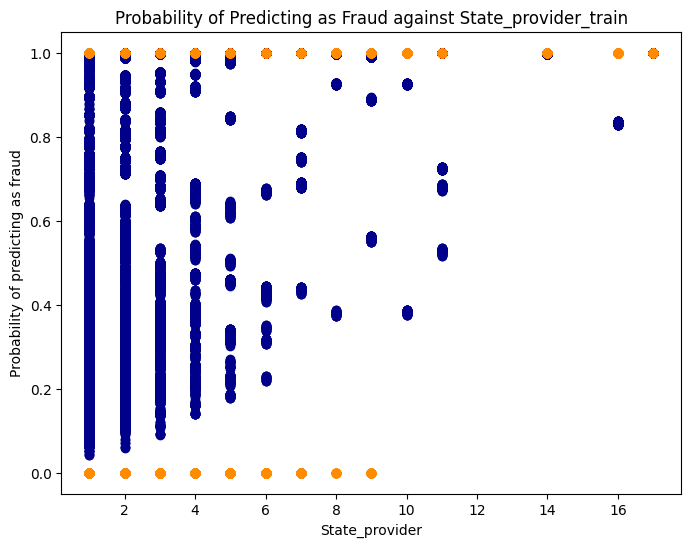

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against State_provider_train')
plt.xlabel('State_provider')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(State_provider,y_train_proba[:,1], color = 'darkblue')
plt.scatter(State_provider, y_train, color = 'darkorange')

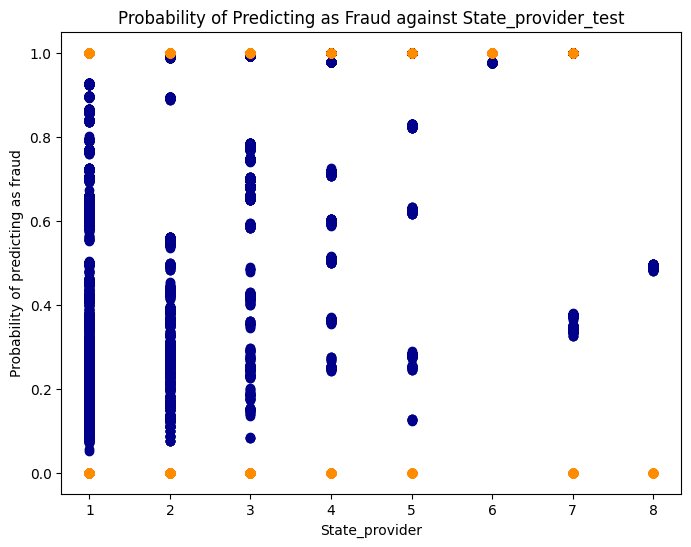

In [ ]:
State_provider = X_test['State_provider']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against State_provider_test')
plt.xlabel('State_provider')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(State_provider,y_test_proba[:,1], color = 'darkblue')
plt.scatter(State_provider, y_test, color = 'darkorange')

#####5.1.4.4.2 AttendingPhysician_provider vs. probablity of fraud

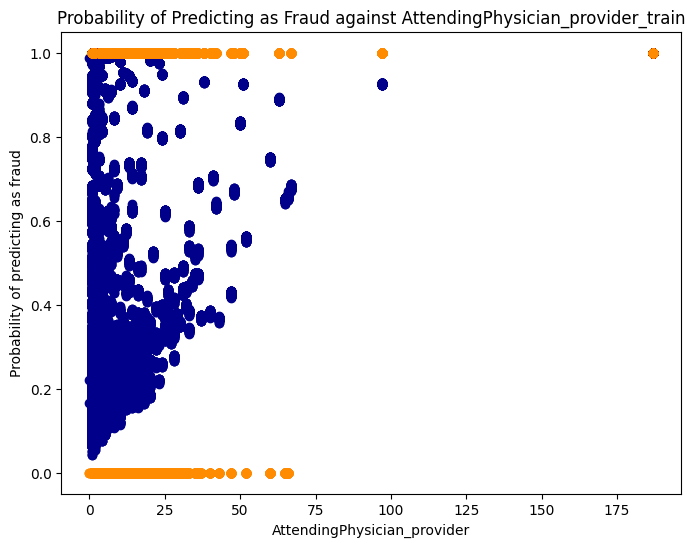

In [ ]:
AttendingPhysician_provider = X_train['AttendingPhysician_provider']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against AttendingPhysician_provider_train')
plt.xlabel('AttendingPhysician_provider')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(AttendingPhysician_provider, y_train_proba[:,1], color = 'darkblue' )
plt.scatter(AttendingPhysician_provider,y_train, color='darkorange')

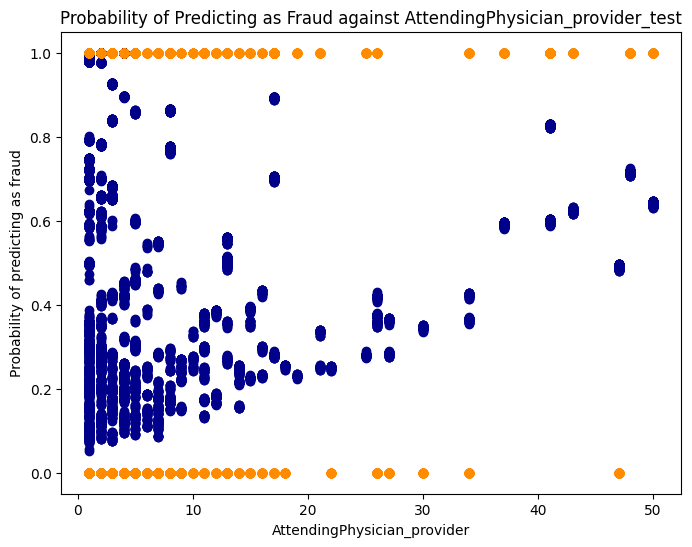

In [ ]:
AttendingPhysician_provider = X_test['AttendingPhysician_provider']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against AttendingPhysician_provider_test')
plt.xlabel('AttendingPhysician_provider')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(AttendingPhysician_provider, y_test_proba[:,1], color = 'darkblue' )
plt.scatter(AttendingPhysician_provider,y_test, color='darkorange')

#####5.1.4.4.3 ClaimID_provider vs. probability of fraud

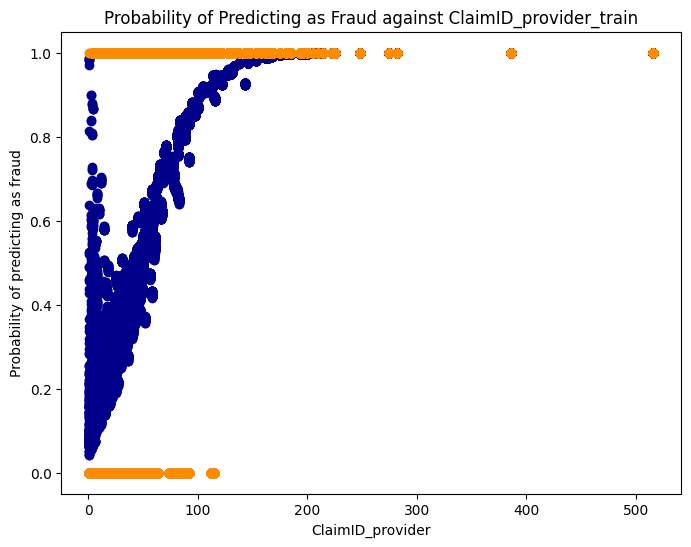

In [ ]:
ClaimID_provider = X_train['ClaimID_provider']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against ClaimID_provider_train')
plt.xlabel('ClaimID_provider')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(ClaimID_provider, y_train_proba[:,1], color = 'darkblue')
plt.scatter(ClaimID_provider, y_train, color = 'darkorange')

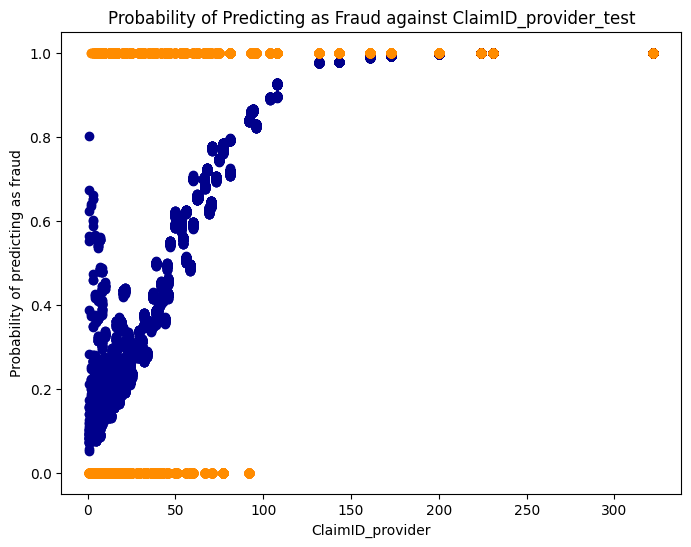

In [ ]:
ClaimID_provider = X_test['ClaimID_provider']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against ClaimID_provider_test')
plt.xlabel('ClaimID_provider')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(ClaimID_provider, y_test_proba[:,1], color = 'darkblue')
plt.scatter(ClaimID_provider, y_test, color = 'darkorange')

#####5.1.4.4.4 ProviderService vs. probability of fraud

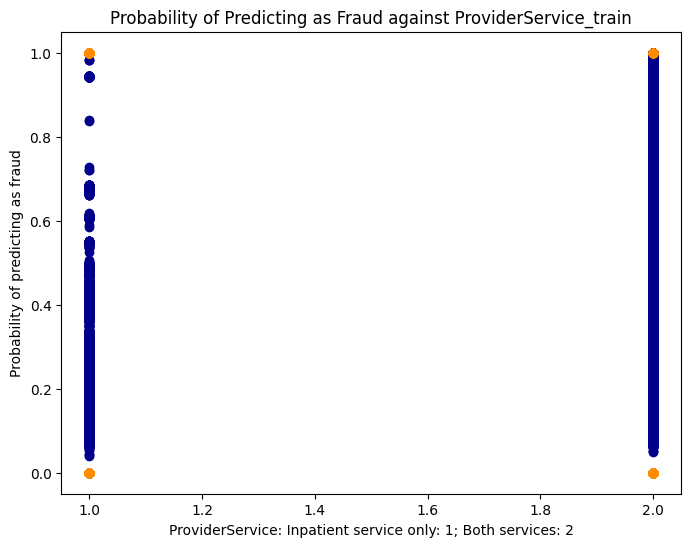

In [ ]:
ProviderService = X_train['ProviderService']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against ProviderService_train')
plt.xlabel('ProviderService: Inpatient service only: 1; Both services: 2')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(ProviderService, y_train_proba[:,1], color = 'darkblue')
plt.scatter(ProviderService, y_train, color = 'darkorange')

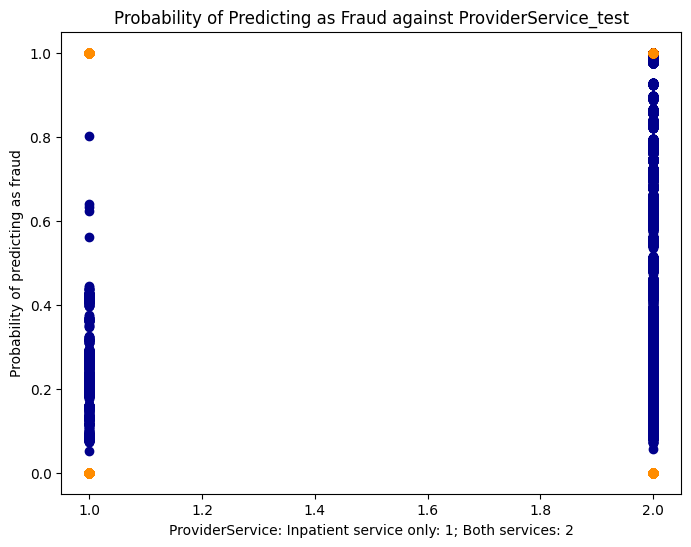

In [ ]:
ProviderService = X_test['ProviderService']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against ProviderService_test')
plt.xlabel('ProviderService: Inpatient service only: 1; Both services: 2')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(ProviderService, y_test_proba[:,1], color = 'darkblue')
plt.scatter(ProviderService, y_test, color = 'darkorange')

#####5.1.4.4.5 InscClaimAmtReimbursed_avg vs. probability of fraud

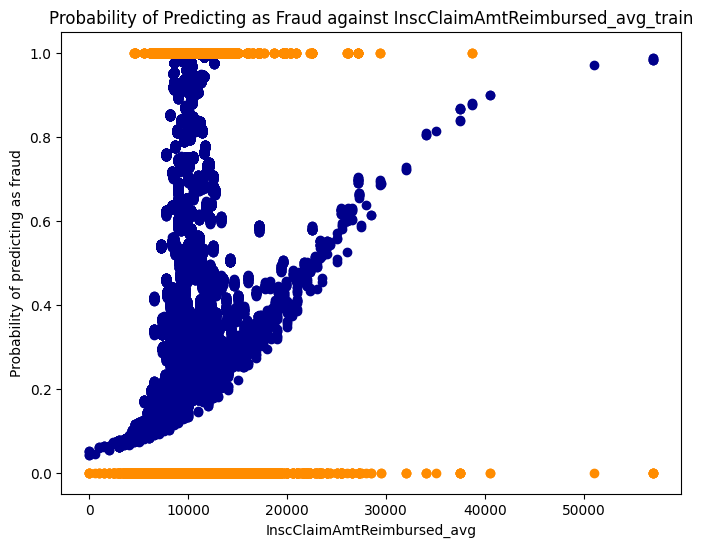

In [ ]:
InscClaimAmtReimbursed_avg = X_train['InscClaimAmtReimbursed_avg']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against InscClaimAmtReimbursed_avg_train')
plt.xlabel('InscClaimAmtReimbursed_avg')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(InscClaimAmtReimbursed_avg, y_train_proba[:,1], color = 'darkblue')
plt.scatter(InscClaimAmtReimbursed_avg, y_train, color = 'darkorange')

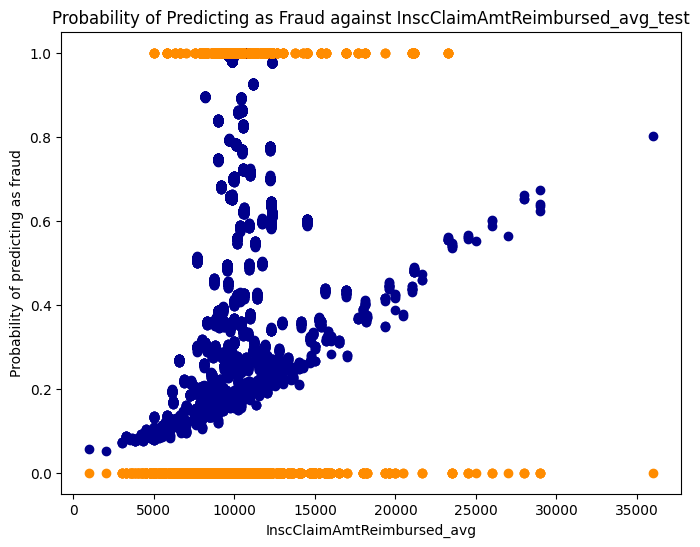

In [ ]:
InscClaimAmtReimbursed_avg = X_test['InscClaimAmtReimbursed_avg']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against InscClaimAmtReimbursed_avg_test')
plt.xlabel('InscClaimAmtReimbursed_avg')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(InscClaimAmtReimbursed_avg, y_test_proba[:,1], color = 'darkblue')
plt.scatter(InscClaimAmtReimbursed_avg, y_test, color = 'darkorange')

#####5.1.4.4.6 num_Physician

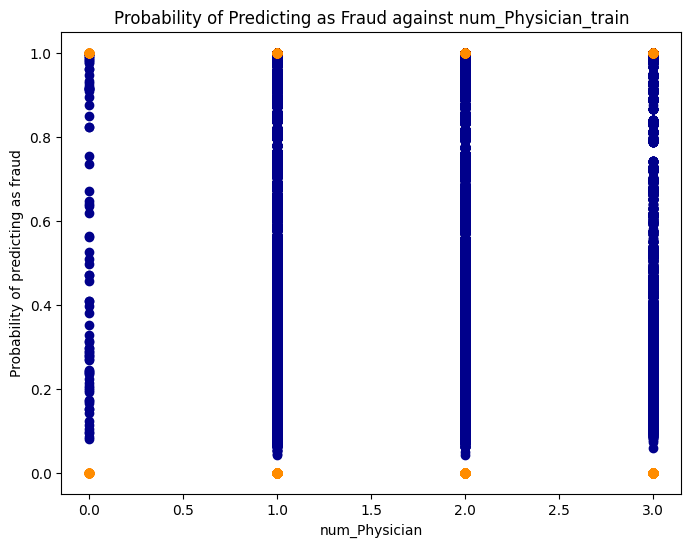

In [ ]:
num_Physician = X_train['num_Physician']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against num_Physician_train')
plt.xlabel('num_Physician')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(num_Physician, y_train_proba[:,1], color = 'darkblue')
plt.scatter(num_Physician, y_train, color = 'darkorange')

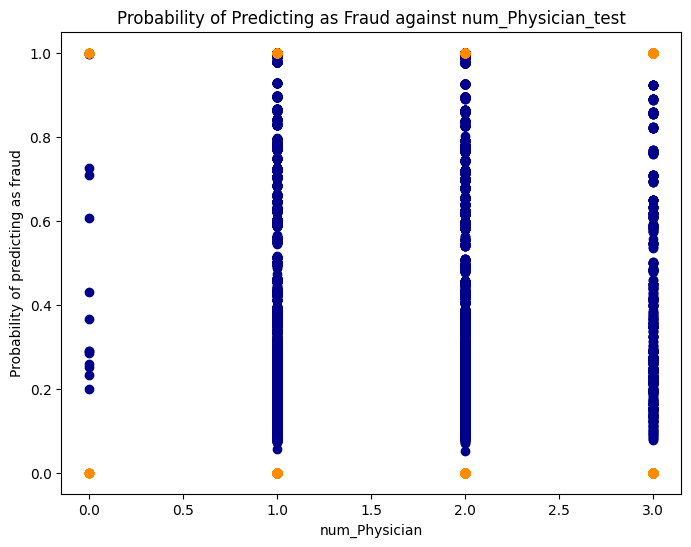

In [ ]:
num_Physician = X_test['num_Physician']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against num_Physician_test')
plt.xlabel('num_Physician')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(num_Physician, y_test_proba[:,1], color = 'darkblue')
plt.scatter(num_Physician, y_test, color = 'darkorange')

#####5.1.4.4.7 num_DiagnosisGroupCode vs. probability of fraud

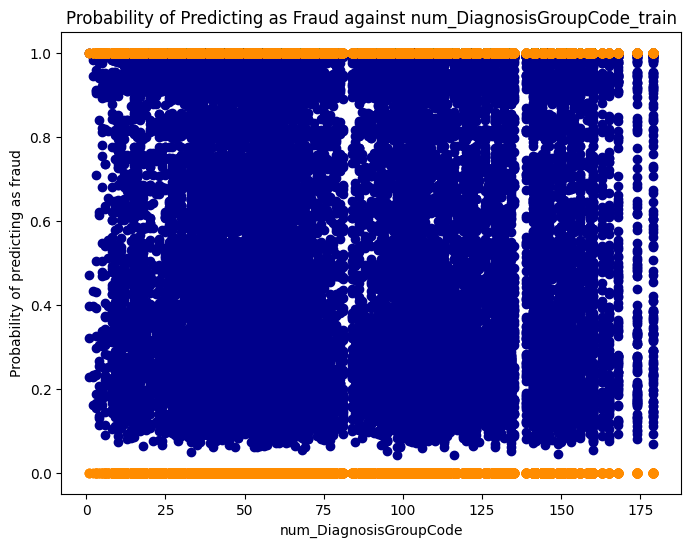

In [ ]:
num_DiagnosisGroupCode = X_train['num_DiagnosisGroupCode']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against num_DiagnosisGroupCode_train')
plt.xlabel('num_DiagnosisGroupCode')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(num_DiagnosisGroupCode, y_train_proba[:,1], color = 'darkblue')
plt.scatter(num_DiagnosisGroupCode, y_train, color = 'darkorange')


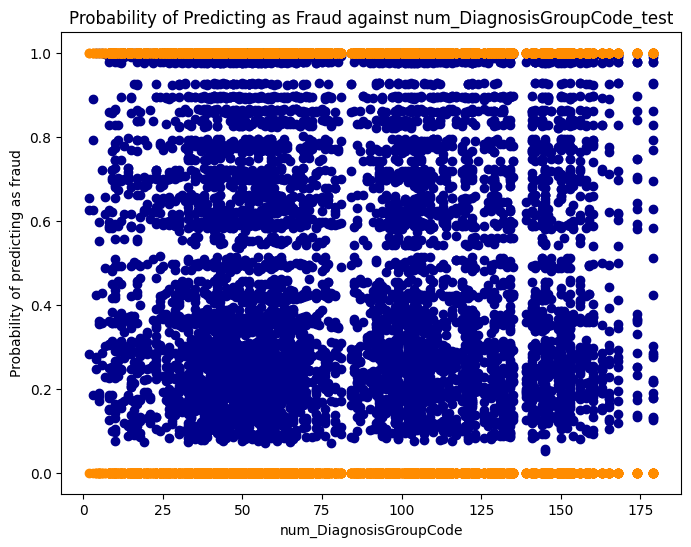

In [ ]:
num_DiagnosisGroupCode = X_test['num_DiagnosisGroupCode']

plt.figure(figsize = (8,6))
plt.title('Probability of Predicting as Fraud against num_DiagnosisGroupCode_test')
plt.xlabel('num_DiagnosisGroupCode')
plt.ylabel('Probability of predicting as fraud')
plt.scatter(num_DiagnosisGroupCode, y_test_proba[:,1], color = 'darkblue')
plt.scatter(num_DiagnosisGroupCode, y_test, color = 'darkorange')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


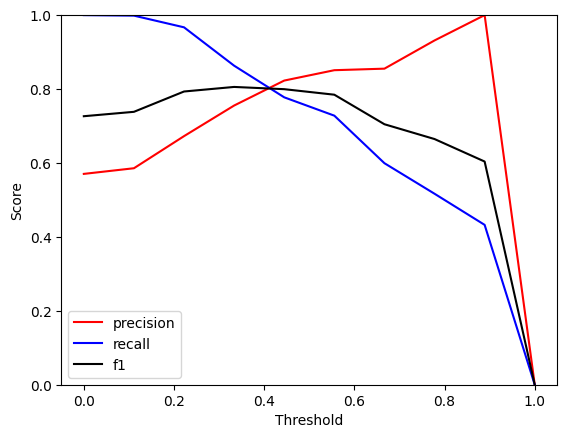

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
thresholds = np.linspace(0, 1, 10)

precisions = []
recalls = []
f1s = []
ave = 'binary'

for cut in thresholds:
  y_test_predic = (y_test_proba[:,1] > cut).astype(int)
  precisions.append(precision_score(y_test, y_test_predic, average = ave))
  recalls.append(recall_score(y_test, y_test_predic, average = ave))
  f1s.append(f1_score(y_test, y_test_predic, average = ave))

plt.plot(thresholds, precisions, color = 'red', label ='precision')
plt.plot(thresholds, recalls, color = 'blue', label = 'recall')
plt.plot(thresholds, f1s, color = 'black', label = 'f1')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc = 'best')
plt.ylim(0,1)
plt.show()

####5.1.4.4 ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_proba[:,1])

0.888092268473633

In [ ]:
roc_auc_score(y_test, y_test_proba[:,1])

0.8590496973447093

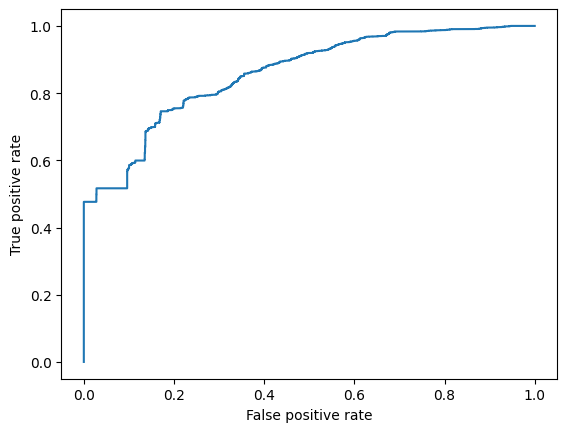

In [ ]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:,1])

# fpr is false positive rate;
# false positive rate (fpr): false positive / (false positive + true negative)
# tpr is true positive rate;
# true positive rate (tpr): true positive / (true positive + false negative)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr, tpr)

In [ ]:
from sklearn.metrics import log_loss

print(log_loss(y_train, y_train_proba))
print(log_loss(y_test, y_test_proba))

0.410402425232434
0.45134458833123703


####5.1.4.4. Feature importance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.0 MB/s eta 0:00:00


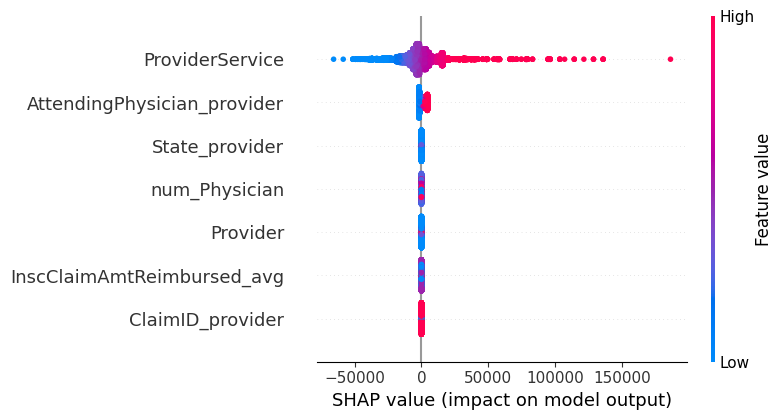

In [ ]:
!pip install shap
import shap


explainer = shap.Explainer(logistic_model[1], X_test )
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=train_features)
# how to explain this figure?

###5.1.6 Random forest

In [ ]:
# depth: 3, alpha: several hundred

###5.1.7 Gradient Boost

##5.2 IP-merge then split

In [ ]:
# df_train_IP_merge2: 55 columns
# df_train_OP_merge2: 52 columns

# df_train_IP_merge2.info() # check if there are 55 columns

# split train_raw and test_raw based on Month of ClaimEndDt
df_train_IP_merge2['Month'] = pd.to_datetime(df_train_IP_merge2['ClaimEndDt']).dt.month
# month range 1-12

train_raw_IP = df_train_IP_merge2[df_train_IP_merge2['Month']<=10].reset_index(drop = True) # month 1-10
test_raw_IP = df_train_IP_merge2[df_train_IP_merge2['Month']>10].reset_index(drop = True) # month 11-12

### 5.2.1 Transform

#### 5.2.1.1 Freq_Transformer

In [ ]:
class Freq_Transformer():
  def fit(self, X, y=None):
    self.keys = set(X)
    print('fit is invoked')

  def transform(self,X,y=None):
    freq = {key:0 for key in self.keys}
    ans = {'ClaimID_provider': [0]*len(X)}
    for item in X:
      freq[item] +=1
    for index in range(len(X)):
      ans['ClaimID_provider'][index] = freq[X[index]]
    print('transform is invoked')
    return pd.DataFrame(ans)

  def fit_transform(self,X,y=None):
    self.fit(X, y)
    print('fit_transform is invoked')
    return self.transform(X,y)

####5.2.1.2 Provider_Classifier

In [ ]:
class Provider_Classifier():
  def fit(self,X, y=None):



In [ ]:
import pandas as pd

class Provider_Classifier:
    def __init__(self):
        self.ip_providers = set()
        self.op_providers = set()

    def fit(self, ip_data, op_data):
        # Fit the classifier based on the ProviderID sets in IP and OP datasets
        self.ip_providers = set(ip_data['ProviderID'])
        self.op_providers = set(op_data['ProviderID'])

    def transform(self, data):
        # Transform the dataset and add the 'ProviderService' column
        data['ProviderService'] = data['ProviderID'].apply(self._classify_provider)
        return data

    def fit_transform(self, ip_data, op_data, data):
        # Fit and transform the dataset
        self.fit(ip_data, op_data)
        return self.transform(data)

    def _classify_provider(self, provider_id):
        # Helper function to classify providers based on IP and OP sets
        if provider_id in self.ip_providers and provider_id in self.op_providers:
            return 2
        elif provider_id in self.ip_providers:
            return 1
        elif provider_id in self.op_providers:
            return 0
        else:
            return -1  # Handle the case where provider_id is not in IP or OP sets


#### 5.2.1.3 Avg_Calculator

#### 5.2.1.4 Counter

###5.2.2 Logistic model